# Lead Score - Case study

### Importing basic necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Preparation and Data Loading

### **Data Reading**

In [2]:
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### **Data Inspection**

In [3]:
df.shape

(9240, 37)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

### **Data Cleaning**

- As there are various values in feature column as `Select` which is same as null because lead had not selected any option over there
- So we can replace this with null value

In [6]:
df.replace('Select', np.nan, inplace = True)

In [7]:
round(df.isnull().sum()/len(df),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

Checking the Lead Conversion rate

In [8]:
conversion_rate = sum(df['Converted']/len(df['Converted'].index))*100
conversion_rate

38.53896103896238

### We will drop the columns having missing values greater then 40%

In [9]:
cols = df.columns

for i in cols:
    if(round(df[i].isnull().sum()/len(df),2)*100) > 40:
        df.drop(i, axis = 1, inplace = True)

In [10]:
round(df.isnull().sum()/len(df),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

### Dealing with remaining null values

In [11]:
def count_plot(feature):
    plt.figure(figsize=(12,5))
    sns.countplot(data = df, x = feature)
    plt.xticks(rotation = 90)
    plt.show()

In [12]:
def value_counting(feature):
    return round(df[feature].value_counts(dropna=False, normalize=True),2)*100

##### 1)City
- It contains 40% missing values

In [13]:
value_counting('City')

City
NaN                            40.0
Mumbai                         35.0
Thane & Outskirts               8.0
Other Cities                    7.0
Other Cities of Maharashtra     5.0
Other Metro Cities              4.0
Tier II Cities                  1.0
Name: proportion, dtype: float64

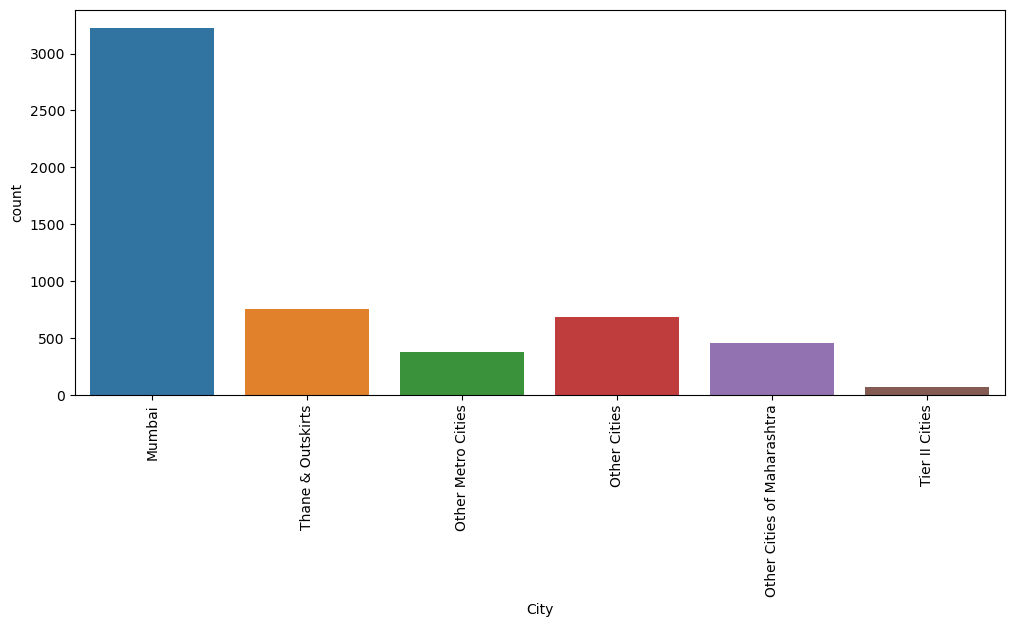

In [14]:
count_plot('City')

##### Since moste of the values are mumbai we can replace missing values with Mumbai but it will create more skewness which will later cause bias in the model. So it will be better to drop City

In [15]:
df.drop('City', axis = 1, inplace = True)

##### 2) Tags
- It contains 36% missing values

In [16]:
value_counting('Tags')

Tags
NaN                                                  36.0
Will revert after reading the email                  22.0
Ringing                                              13.0
Interested in other courses                           6.0
Already a student                                     5.0
Closed by Horizzon                                    4.0
switched off                                          3.0
Busy                                                  2.0
Lost to EINS                                          2.0
Not doing further education                           2.0
Interested  in full time MBA                          1.0
Graduation in progress                                1.0
invalid number                                        1.0
Diploma holder (Not Eligible)                         1.0
wrong number given                                    1.0
opp hangup                                            0.0
number not provided                                   0.0
in touch 

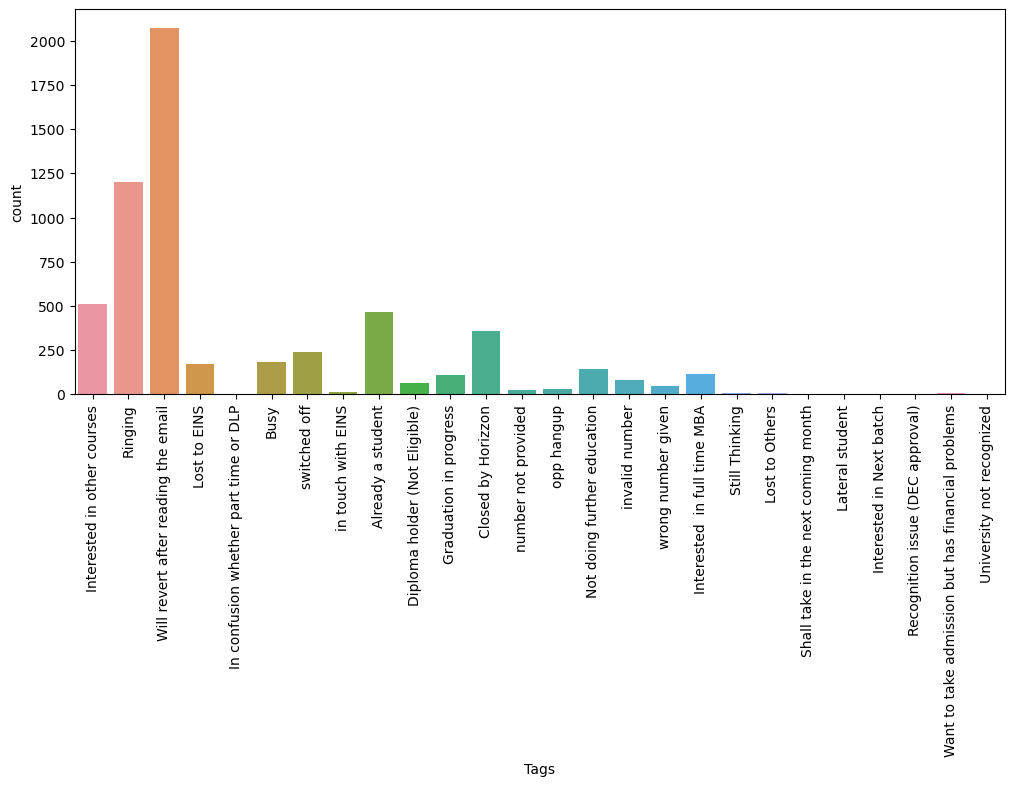

In [17]:
count_plot("Tags")

##### Since moste of the values are `Will revert after reading the email` we can replace missing values with Mumbai

In [18]:
df['Tags'] = df['Tags'].replace(np.nan, 'Will revert after reading the email')

##### 3) What matters most to you in choosing a course
- It contains 29% missing values

In [19]:
value_counting('What matters most to you in choosing a course')

What matters most to you in choosing a course
Better Career Prospects      71.0
NaN                          29.0
Flexibility & Convenience     0.0
Other                         0.0
Name: proportion, dtype: float64

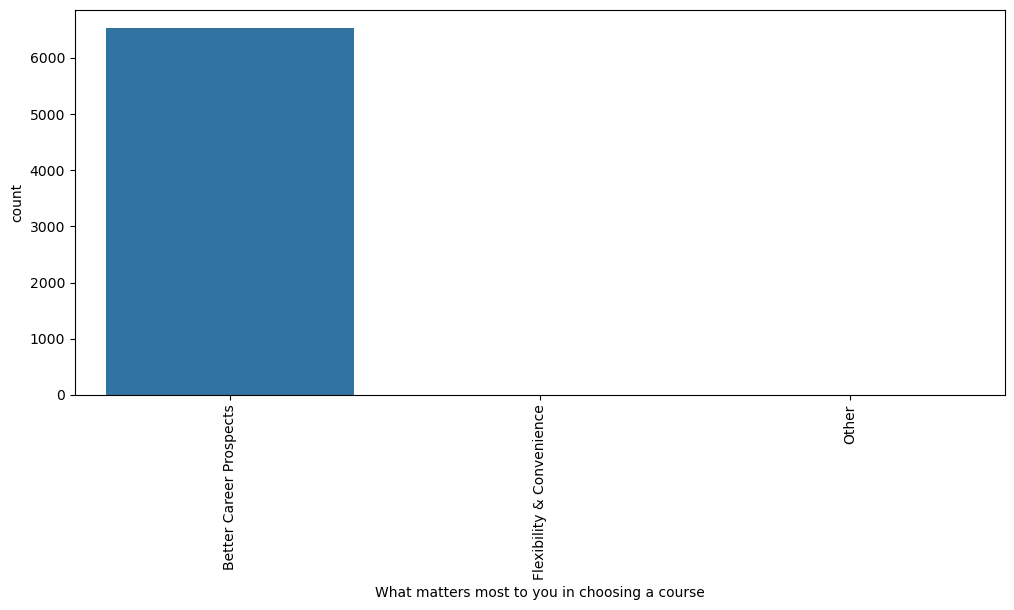

In [20]:
count_plot('What matters most to you in choosing a course')

##### We can see that this feature is highly skewed so it is better to drop this column

In [21]:
df.drop('What matters most to you in choosing a course',axis = 1, inplace = True)

##### 4) What is your current occupation
- It contains 29% missing values

In [22]:
value_counting('What is your current occupation')

What is your current occupation
Unemployed              61.0
NaN                     29.0
Working Professional     8.0
Student                  2.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: proportion, dtype: float64

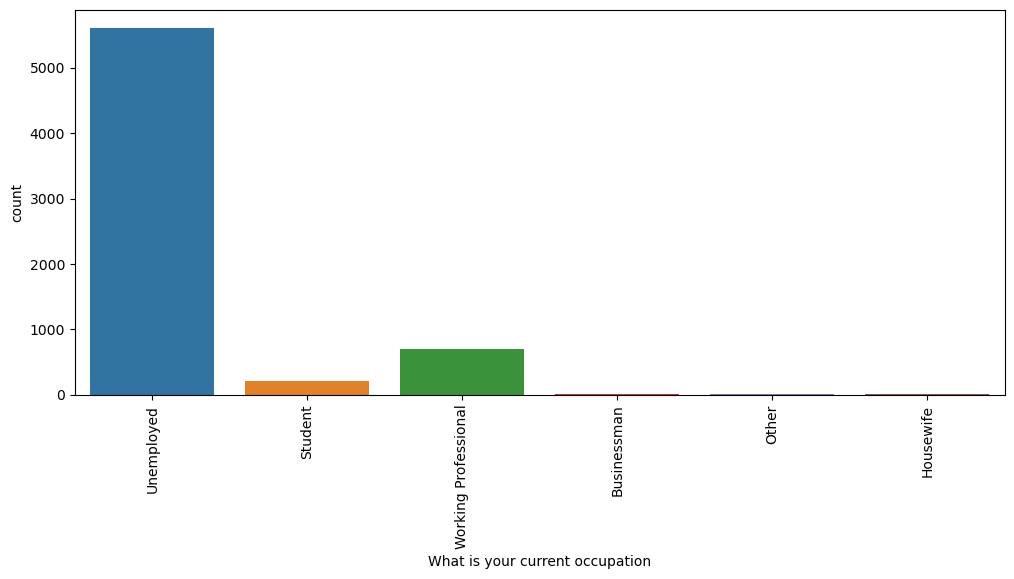

In [23]:
count_plot('What is your current occupation')

##### We can see that this feature is highly skewed so it is better to drop this column

In [24]:
df.drop('What is your current occupation',axis = 1, inplace = True)

##### 5) Country
- It contains 27% missing values

In [25]:
value_counting('Country')

Country
India                   70.0
NaN                     27.0
United States            1.0
United Arab Emirates     1.0
Singapore                0.0
Saudi Arabia             0.0
United Kingdom           0.0
Australia                0.0
Qatar                    0.0
Bahrain                  0.0
Hong Kong                0.0
Oman                     0.0
France                   0.0
unknown                  0.0
Kuwait                   0.0
South Africa             0.0
Canada                   0.0
Nigeria                  0.0
Germany                  0.0
Sweden                   0.0
Philippines              0.0
Uganda                   0.0
Italy                    0.0
Bangladesh               0.0
Netherlands              0.0
Asia/Pacific Region      0.0
China                    0.0
Belgium                  0.0
Ghana                    0.0
Kenya                    0.0
Sri Lanka                0.0
Tanzania                 0.0
Malaysia                 0.0
Liberia                  0.0
Switze

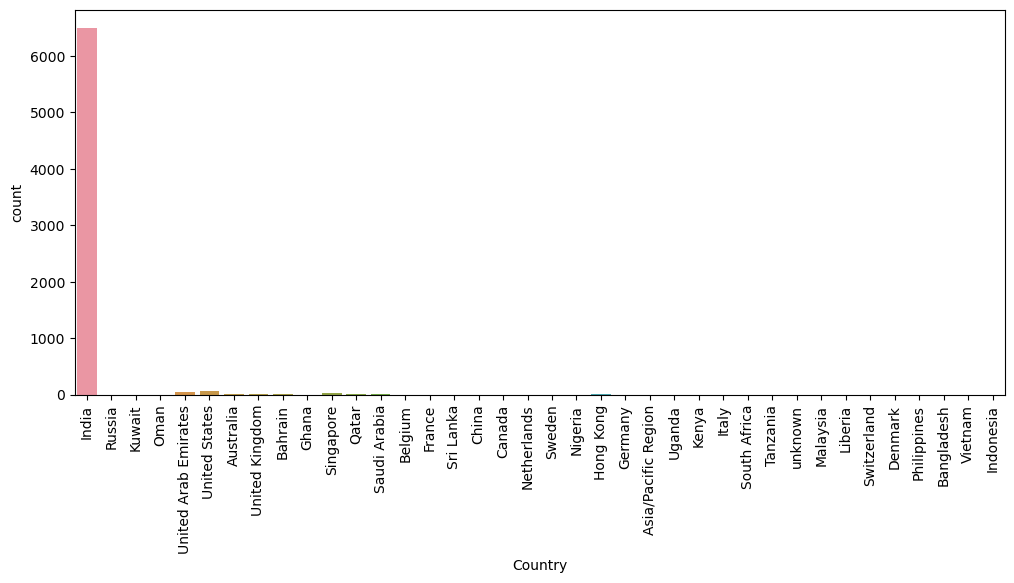

In [26]:
count_plot('Country')

##### We can see that this feature is highly skewed so it is better to drop this column

In [27]:
df.drop('Country',axis = 1, inplace = True)

##### 6) Specialization
- It contains 37% missing values

In [28]:
value_counting('Specialization')

Specialization
NaN                                  37.0
Finance Management                   11.0
Human Resource Management             9.0
Marketing Management                  9.0
Operations Management                 5.0
Business Administration               4.0
IT Projects Management                4.0
Supply Chain Management               4.0
Banking, Investment And Insurance     4.0
Travel and Tourism                    2.0
Media and Advertising                 2.0
International Business                2.0
Healthcare Management                 2.0
Hospitality Management                1.0
E-COMMERCE                            1.0
Retail Management                     1.0
Rural and Agribusiness                1.0
E-Business                            1.0
Services Excellence                   0.0
Name: proportion, dtype: float64

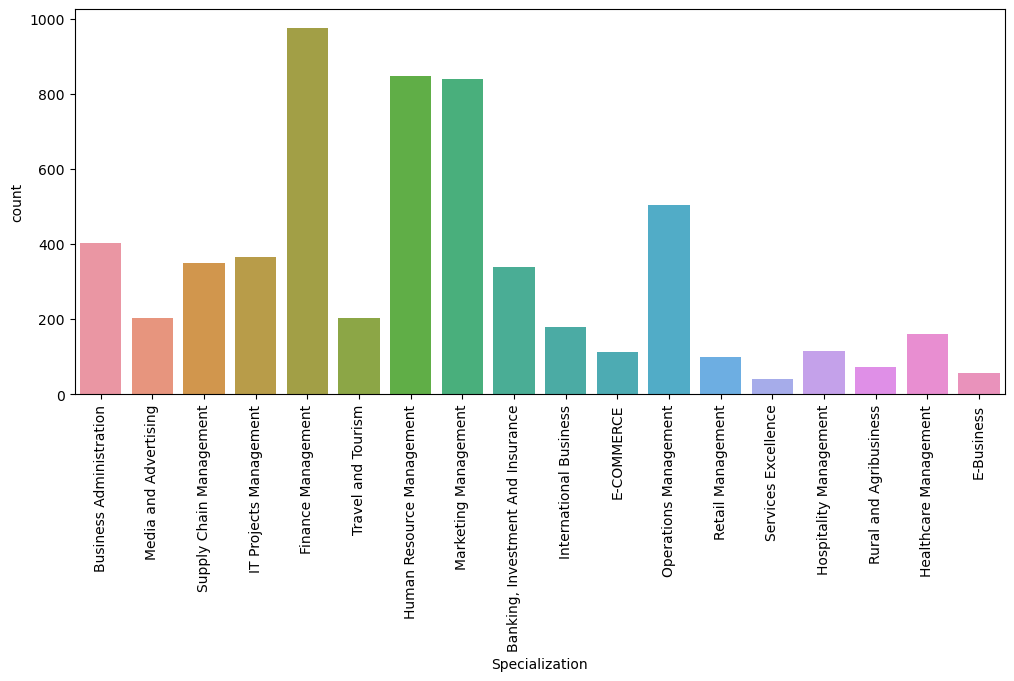

In [29]:
count_plot('Specialization')

- It may be possible that the lead may be unemployed or do not have any specialization or it may be a student 
So we will replace it by `Others`

In [30]:
df['Specialization'].replace(np.nan, 'Others', inplace = True)

##### Lets check for the null valuess again after performing action on various null columns

In [31]:
round(df.isnull().sum()/len(df),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 1.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        1.0
Last Activity                               1.0
Specialization                              0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                    

##### Remaining missing values are less then 2% se we can remove those columns

In [32]:
df.dropna(inplace=True)

In [33]:
round(df.isnull().sum()/len(df),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                    

##### Now we dont have have any missing values left in dataset

## Removing Unwanted Columns

#### Droping columns that are of no use for modeling

In [34]:
# Dropping Columns
lead = df.drop(['Prospect ID','Lead Number'],axis = 1)

#### Handling columns for unique values

In [35]:
#check for columns unique value

lead.describe(include = 'object')

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Specialization,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074
unique,4,21,2,2,17,19,2,1,2,2,2,2,2,1,26,1,1,1,2,16
top,Landing Page Submission,Google,No,No,Email Opened,Others,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,No,No,Modified
freq,4885,2868,8358,9072,3432,3282,9060,9074,9072,9073,9073,9070,9067,9074,5343,9074,9074,9074,6186,3267


##### Following column have only 1 unique value
- Magazine
- Receive More Updates About Our Courses
- Update me on Supply Chain Content
- Get updates on DM Content
- I agree to pay the amount through cheque

As these columns contain only 1 category it's of no use for us therefore we can drop this columns

In [36]:
lead = lead.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content',
                  'Get updates on DM Content','I agree to pay the amount through cheque'],axis = 1)

#### Checking for dublicates:

In [37]:
df[df.duplicated]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


#### There are no dublicate data present in our dataset

#### Checking for categorical data

In [38]:
def count_plot2(feature):
    plt.figure(figsize=(8,4))
    sns.countplot(data = lead, x = feature)
    plt.xticks(rotation = 90)
    plt.show()

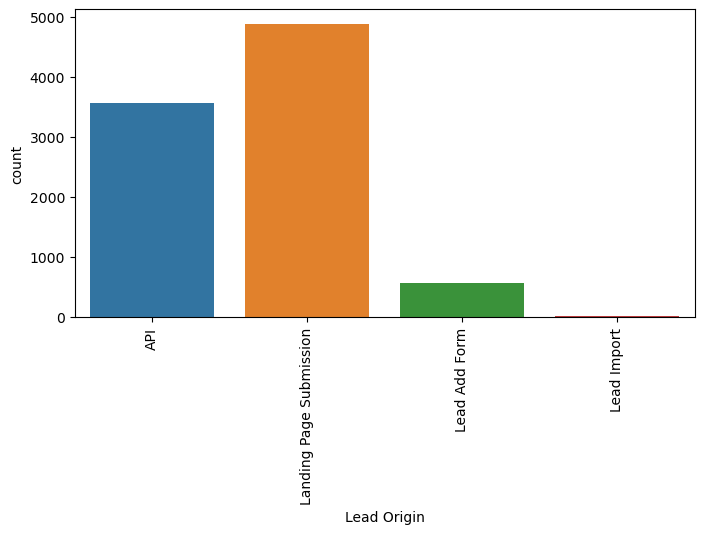

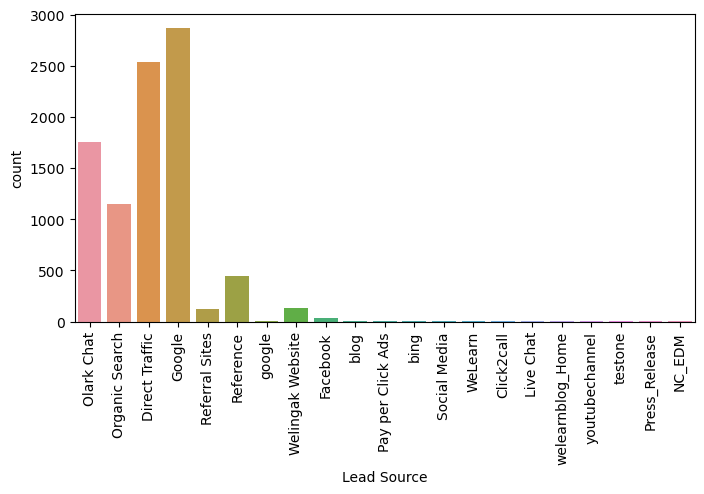

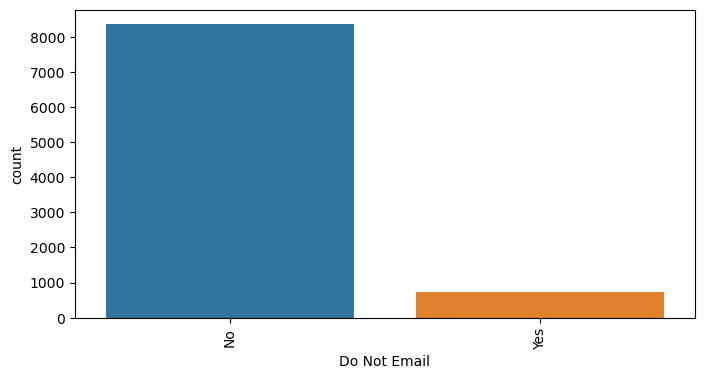

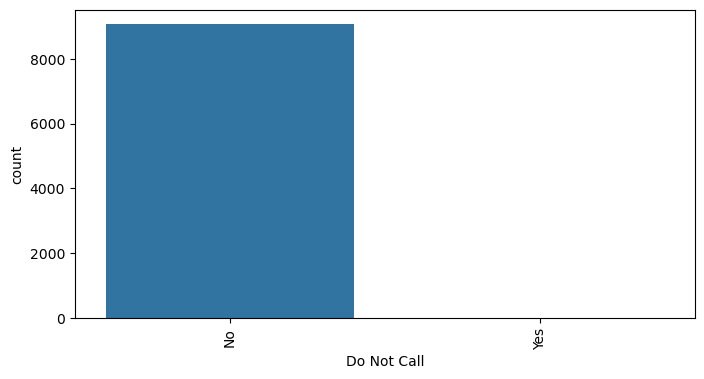

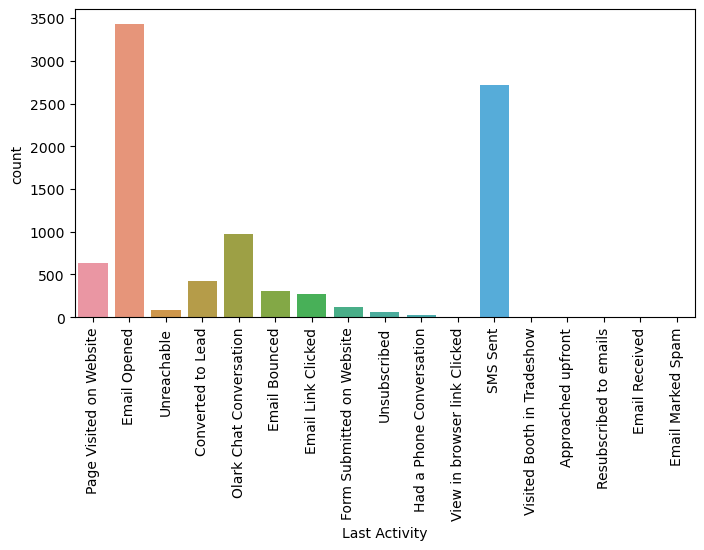

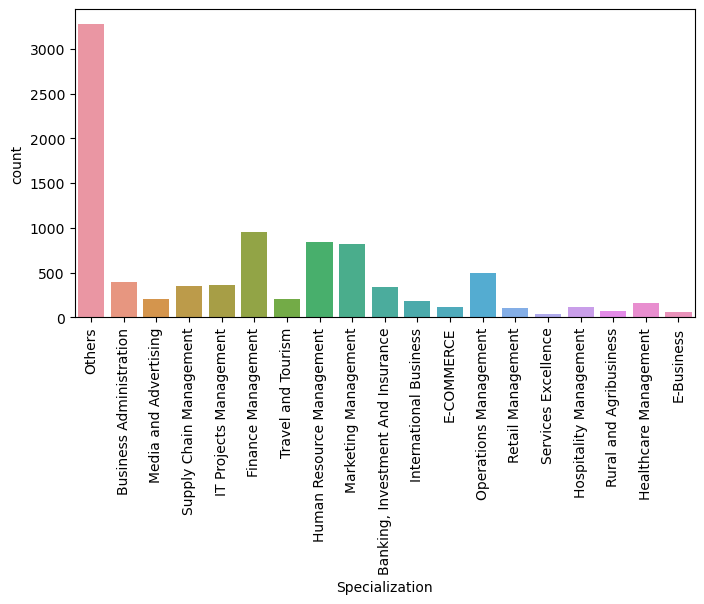

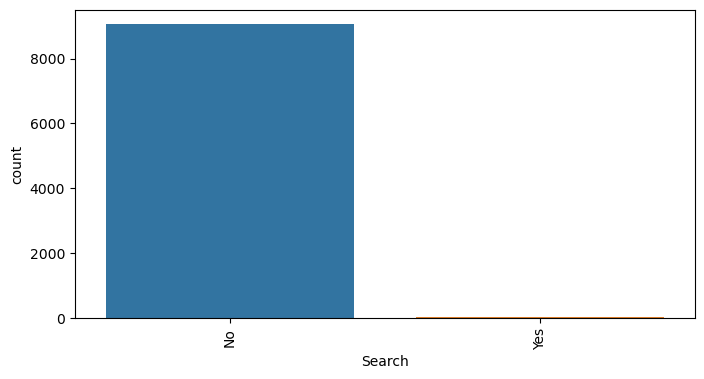

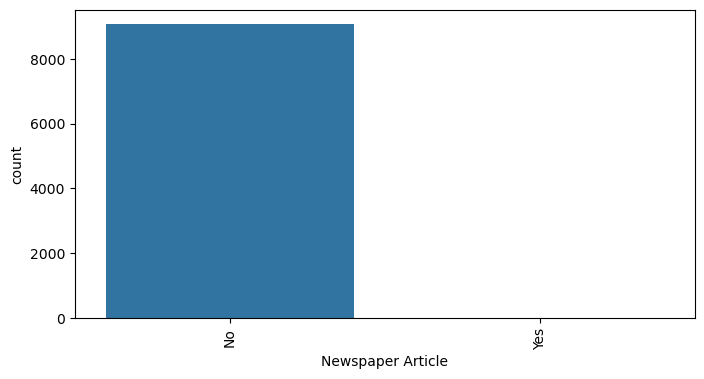

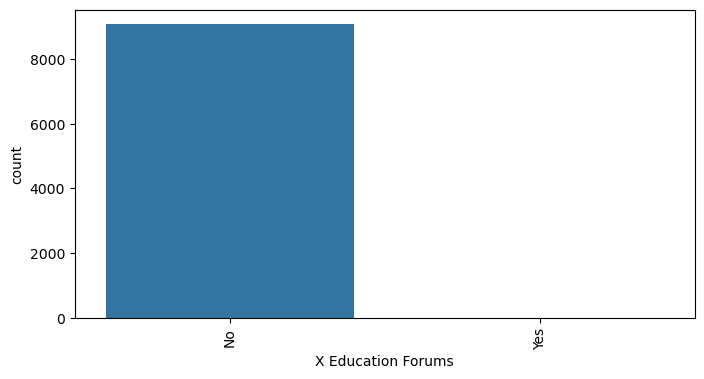

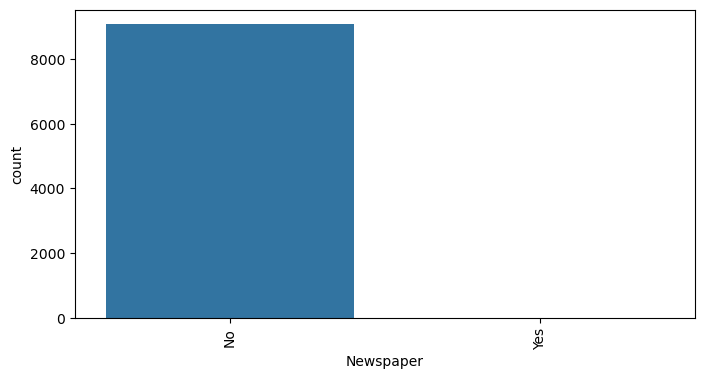

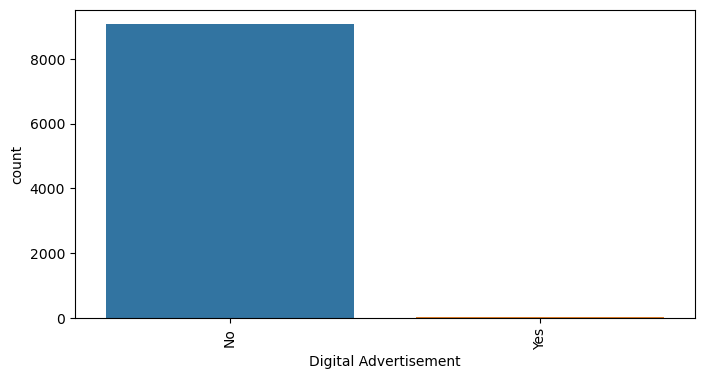

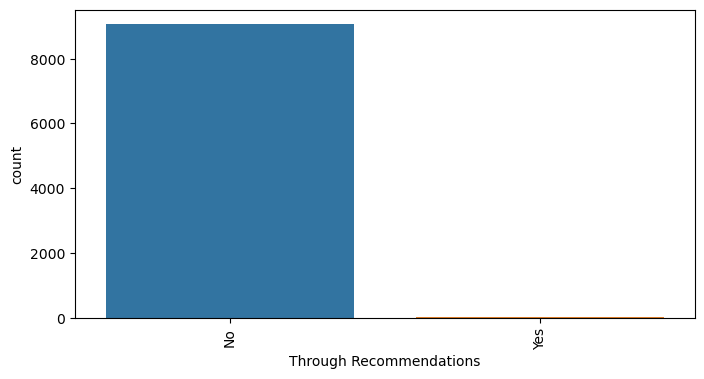

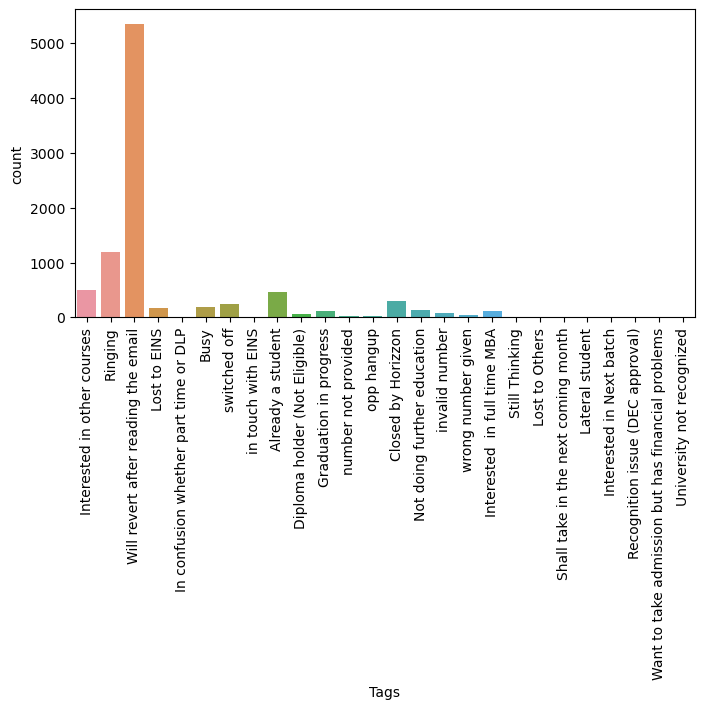

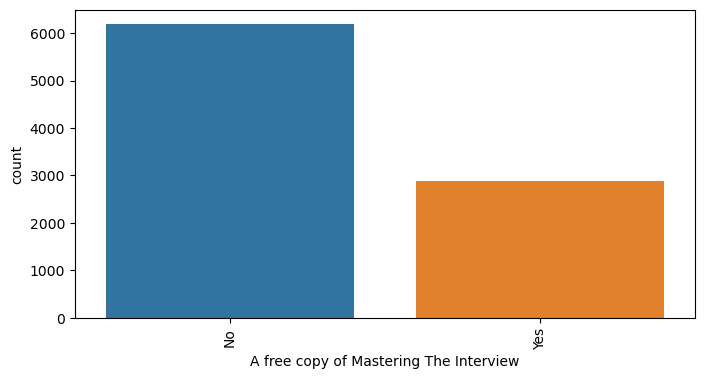

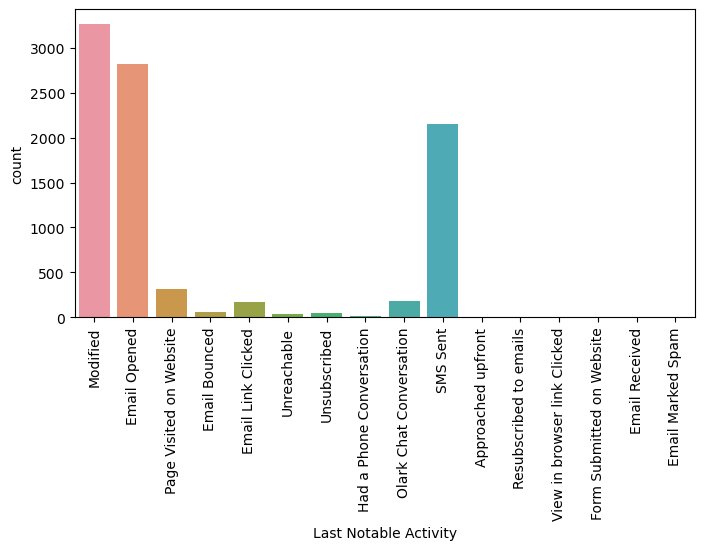

In [39]:
catog_col = lead.select_dtypes(include=['category', 'object']).columns.tolist()
for i in catog_col:
    count_plot2(i)

#### Here some column have highly skewed data
- Do Not Call
- Search
- Newspaper Article
- X Education Forums
- Newspaper
- Digital Advertisement
- Through Recommendations

Hence these columns can be dropped as they will not add any value to the model.

In [40]:
lead.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations'],axis = 1,inplace = True)

In [41]:
lead.shape

(9074, 12)

#### Grouping Low Frequency Values`

In [42]:
categoric_data = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Specialization', 'Tags', 
                  'A free copy of Mastering The Interview', 'Last Notable Activity']
for i in categoric_data:
    print('Value Count of:')
    data = lead[i].value_counts(normalize=True)*100
    print(data,'\n')
    print("= * ="*16)

Value Count of:
Lead Origin
Landing Page Submission    53.835133
API                        39.431342
Lead Add Form               6.402909
Lead Import                 0.330615
Name: proportion, dtype: float64 

= * == * == * == * == * == * == * == * == * == * == * == * == * == * == * == * =
Value Count of:
Lead Source
Google               31.606789
Direct Traffic       28.025127
Olark Chat           19.318933
Organic Search       12.717655
Reference             4.882081
Welingak Website      1.421644
Referral Sites        1.377562
Facebook              0.341635
bing                  0.066123
google                0.055102
Click2call            0.044082
Press_Release         0.022041
Social Media          0.022041
Live Chat             0.022041
youtubechannel        0.011020
testone               0.011020
Pay per Click Ads     0.011020
welearnblog_Home      0.011020
WeLearn               0.011020
blog                  0.011020
NC_EDM                0.011020
Name: proportion, dtype: floa

- Google and Google are same with lase different in them so we have to merge them
- Grouping low frequency value to 'Other' 

In [43]:
lead['Lead Source'].replace('google','Google', inplace=True)

In [44]:
lead['Lead Source'].replace(['Welingak Website','Referral Sites','Facebook','bing','Click2call','Press_Release','Social Media','Live Chat',
                             'youtubechannel','testone','Pay per Click Ads','welearnblog_Home',
                             'WeLearn','blog','NC_EDM'], 'Others', inplace = True)

lead['Last Activity'].replace(['Resubscribed to emails','Visited Booth in Tradeshow','Email Marked Spam ',
                              'Email Received ','Approached upfront','View in browser link Clicked',
                               'Had a Phone Conversation','Unsubscribed','Unreachable','Form Submitted on Website'],
                             'Others', inplace=True)

lead['Specialization'].replace(['International Business','Healthcare Management','Retail Management','E-COMMERCE',
                               'Hospitality Management','Rural and Agribusiness','E-Business','Services Excellence'],
                              'Others', inplace=True)

lead['Tags'].replace(['invalid number','Diploma holder (Not Eligible)','wrong number given','opp hangup','in touch with EINS',
                      'number not provided','Lost to Others','Still Thinking','Want to take admission but has financial problems',
                     'In confusion whether part time or DLP','Interested in Next batch','Lateral student','Shall take in the next coming month',
                     'University not recognized','Recognition issue (DEC approval)'], 'Others', inplace=True)

lead['Last Notable Activity'].replace(['Email Link Clicked ','Email Bounced','Unsubscribed','Unreachable',
                                       'Had a Phone Conversation','Email Marked Spam','Approached upfront',
                                      'Resubscribed to emails','View in browser link Clicked','Email Received',
                                      'Form Submitted on Website'], 'Others', inplace=True)

In [45]:
categoric_data = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Specialization', 'Tags', 
                  'A free copy of Mastering The Interview', 'Last Notable Activity']
for i in categoric_data:
    print('Value Count of:')
    data = lead[i].value_counts(normalize=True)*100
    print(data,'\n')
    print("= * ="*16)

Value Count of:
Lead Origin
Landing Page Submission    53.835133
API                        39.431342
Lead Add Form               6.402909
Lead Import                 0.330615
Name: proportion, dtype: float64 

= * == * == * == * == * == * == * == * == * == * == * == * == * == * == * == * =
Value Count of:
Lead Source
Google            31.661891
Direct Traffic    28.025127
Olark Chat        19.318933
Organic Search    12.717655
Reference          4.882081
Others             3.394313
Name: proportion, dtype: float64 

= * == * == * == * == * == * == * == * == * == * == * == * == * == * == * == * =
Value Count of:
Do Not Email
No     92.109323
Yes     7.890677
Name: proportion, dtype: float64 

= * == * == * == * == * == * == * == * == * == * == * == * == * == * == * == * =
Value Count of:
Last Activity
Email Opened               37.822350
SMS Sent                   29.931673
Olark Chat Conversation    10.711924
Page Visited on Website     7.053119
Converted to Lead           4.716773
Em

#### Checking for outliers in  numerical Data

In [46]:
numeric_data = []
for i in lead.columns:
    if i not in catog_col and i != 'Converted':
        numeric_data.append(i)
        
numeric_data

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [47]:
def numeric_outlier(data,feature):

    plt.figure(figsize=[20,10])

    for i,j in enumerate(feature):
        plt.subplot(2,2,i+1)

        sns.boxplot(data[j])

        plt.suptitle("\nChecking Outliers using Boxplot",fontsize=20,color="green")
        
        plt.title(j,fontsize=15,color='red')

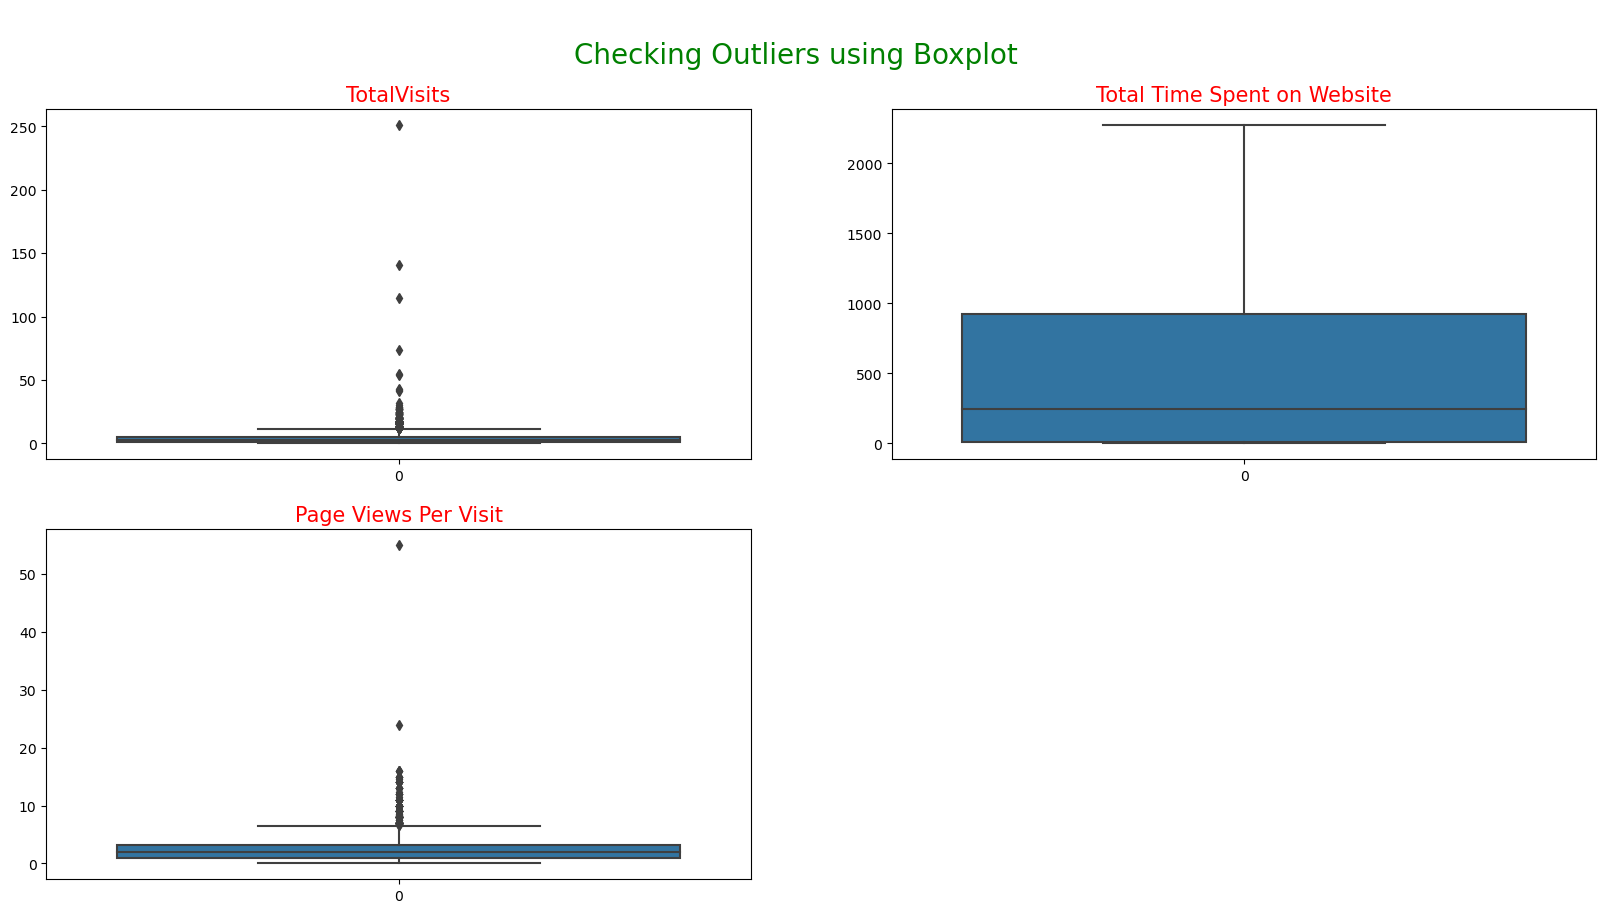

In [48]:
numeric_outlier(lead, numeric_data)

In [49]:
lead.describe([.1,.25,.5,.75,.9])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.456028,482.887481,2.370151
std,0.485053,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
90%,1.000000,7.000000,1373.000000,5.000000
max,1.000000,251.000000,2272.000000,55.000000


- `TotalVisits` and `Page View Per Visit`. Both the variables contains outliers 


- Treating Outliers

In [50]:
def treat_outlier(data,feature):
    for i in feature:
        q1 = data[i].describe()['25%']
        q3 = data[i].describe()['75%']
        iqr = q3 - q1
        
        upper_bound = q3 + 1.5*iqr
        lower_bound = q1 - 1.5*iqr
        
#         np.where(condition , if true do this, 2nd condition, if true do this, else)

        data[i] = np.where(data[i] > upper_bound, upper_bound, data[i])
    
        data[i] = np.where(data[i] < lower_bound, lower_bound, data[i])

In [51]:
outlier_feature = ['TotalVisits', "Page Views Per Visit"]
treat_outlier(lead, outlier_feature)

In [52]:
lead.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.230769,482.887481,2.285762
std,0.485053,2.880797,545.256560,1.834443
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
max,1.000000,11.000000,2272.000000,6.500000


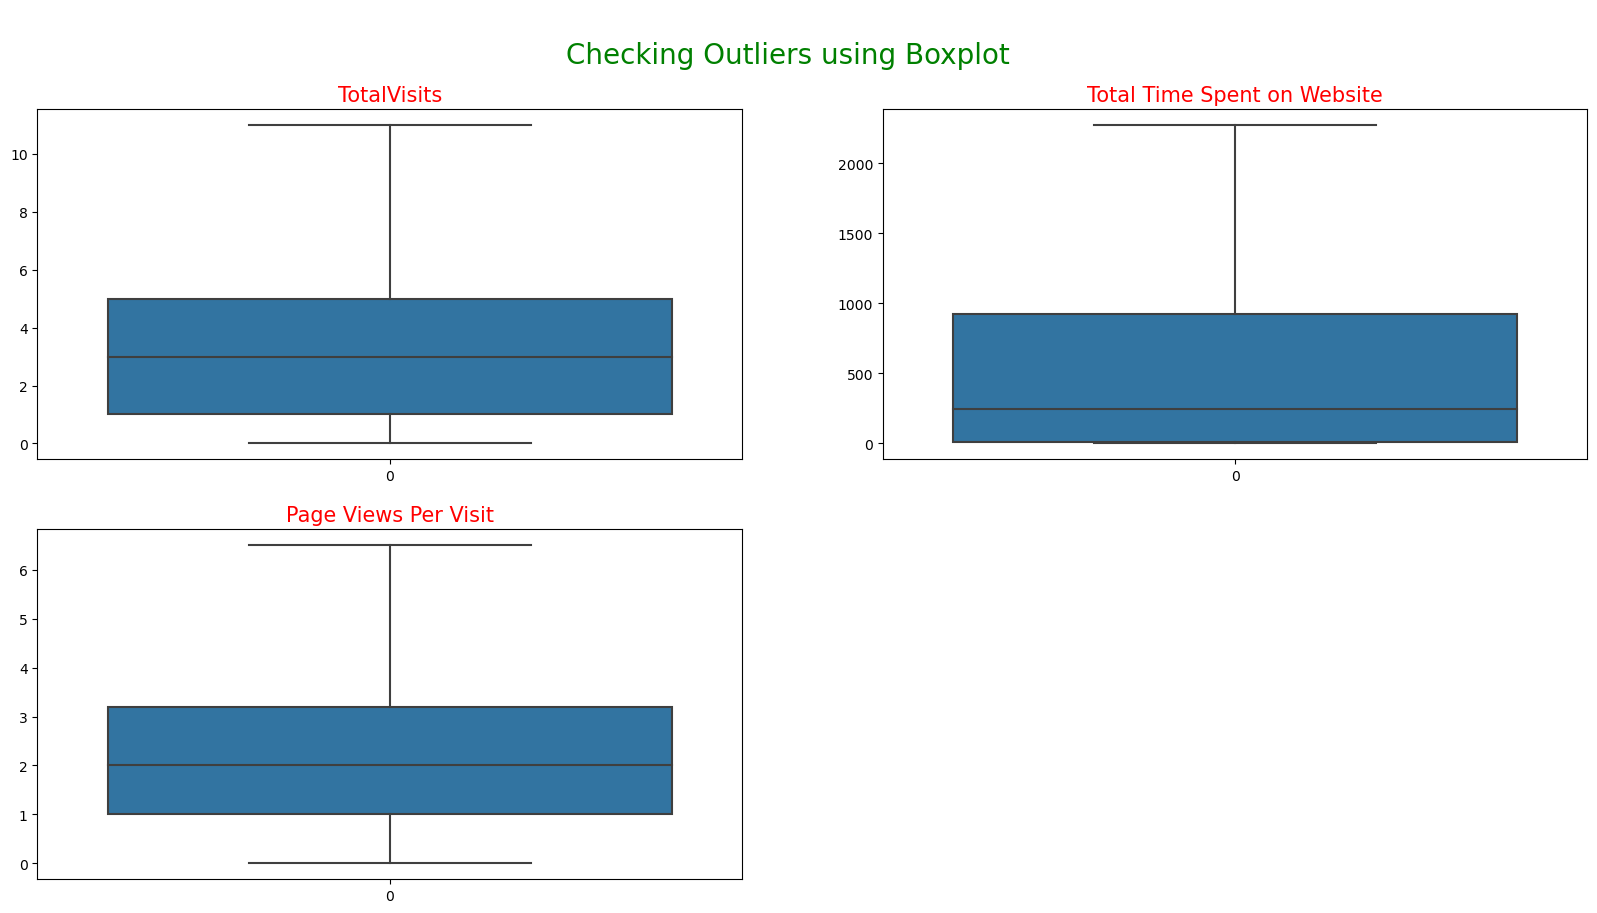

In [53]:
numeric_outlier(lead, numeric_data)

# Exploratory Data Analysis

## Univariate Analysis

**Lead** **Origin**

In [54]:
lead['Lead Origin'].value_counts()

Lead Origin
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: count, dtype: int64

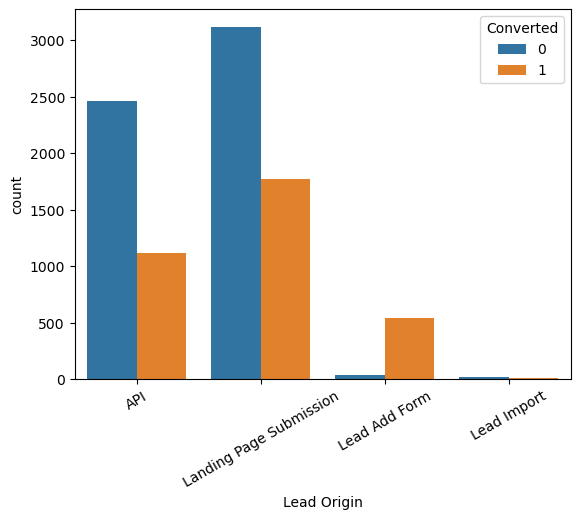

In [55]:
sns.countplot(x = lead['Lead Origin'],hue = lead.Converted)
plt.rcParams.update({'font.size': 8})
plt.xticks(rotation=30)
plt.show()

- API and Landing Page Submission show a good conversion rate and are good enough in number.<br>
- While Lead Add Form has high conversion rate but do not have enough counts.

**Lead Source**

In [56]:
#Lead Source
lead['Lead Source'].value_counts()

Lead Source
Google            2873
Direct Traffic    2543
Olark Chat        1753
Organic Search    1154
Reference          443
Others             308
Name: count, dtype: int64

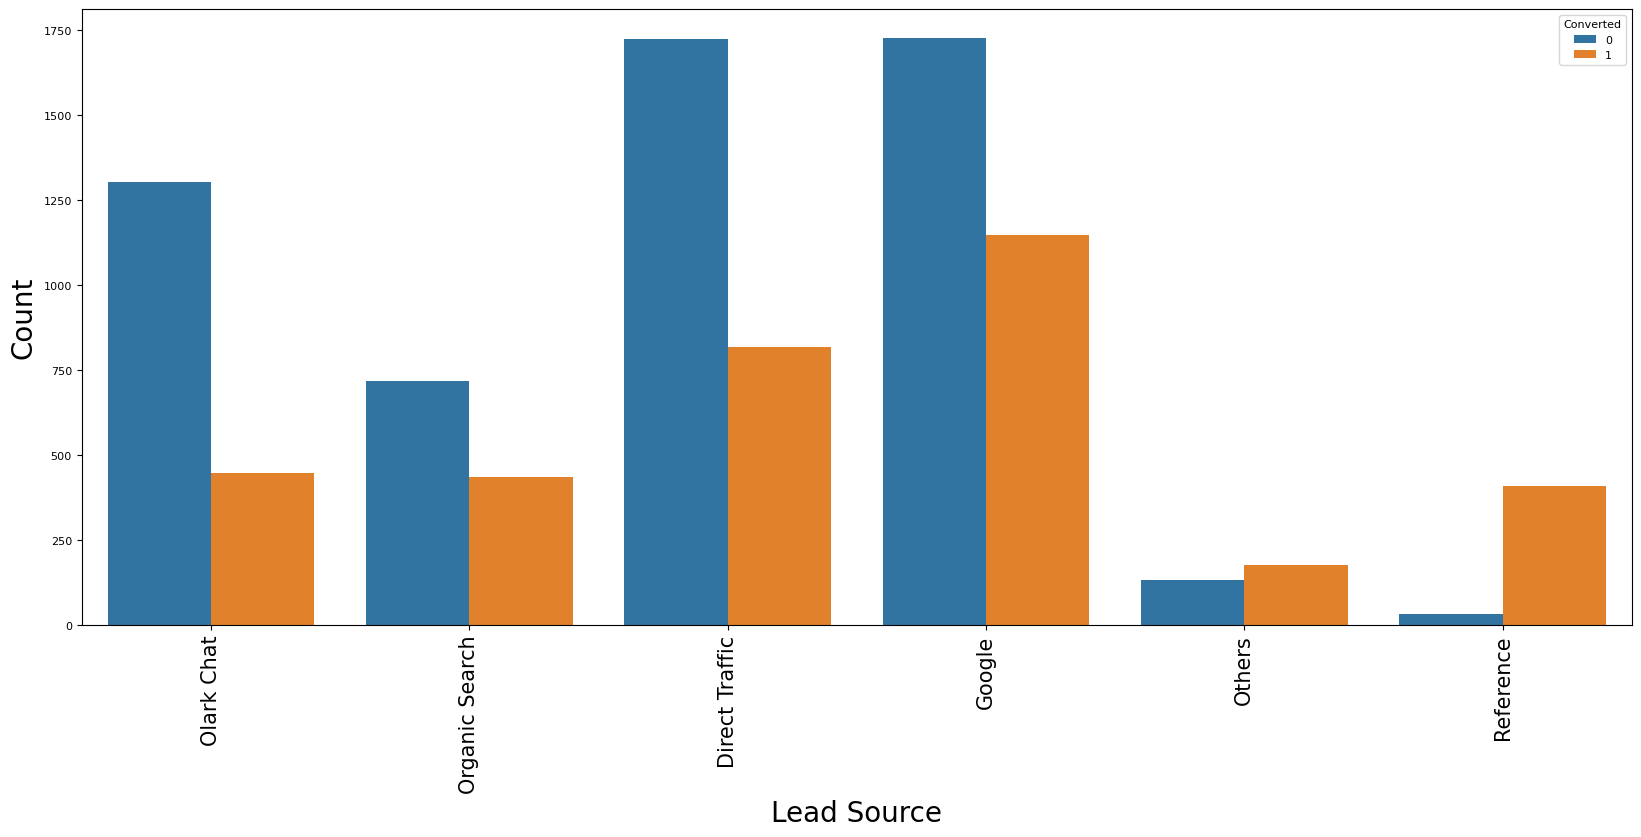

In [57]:
plt.figure(figsize = (20,8))
sns.countplot(x = lead['Lead Source'],hue = lead.Converted)
plt.xticks(rotation=90,fontsize=15)
plt.xlabel('Lead Source', size = 20)
plt.ylabel('Count', size = 20)

plt.show()

- Most of the leads are generated by Google and Direct Traffic which have a good conversion rate.<br>
- Leads by Reference & Wellingnak Website are mostly converted.

**Do Not Email**

In [58]:
lead['Do Not Email'].value_counts()

Do Not Email
No     8358
Yes     716
Name: count, dtype: int64

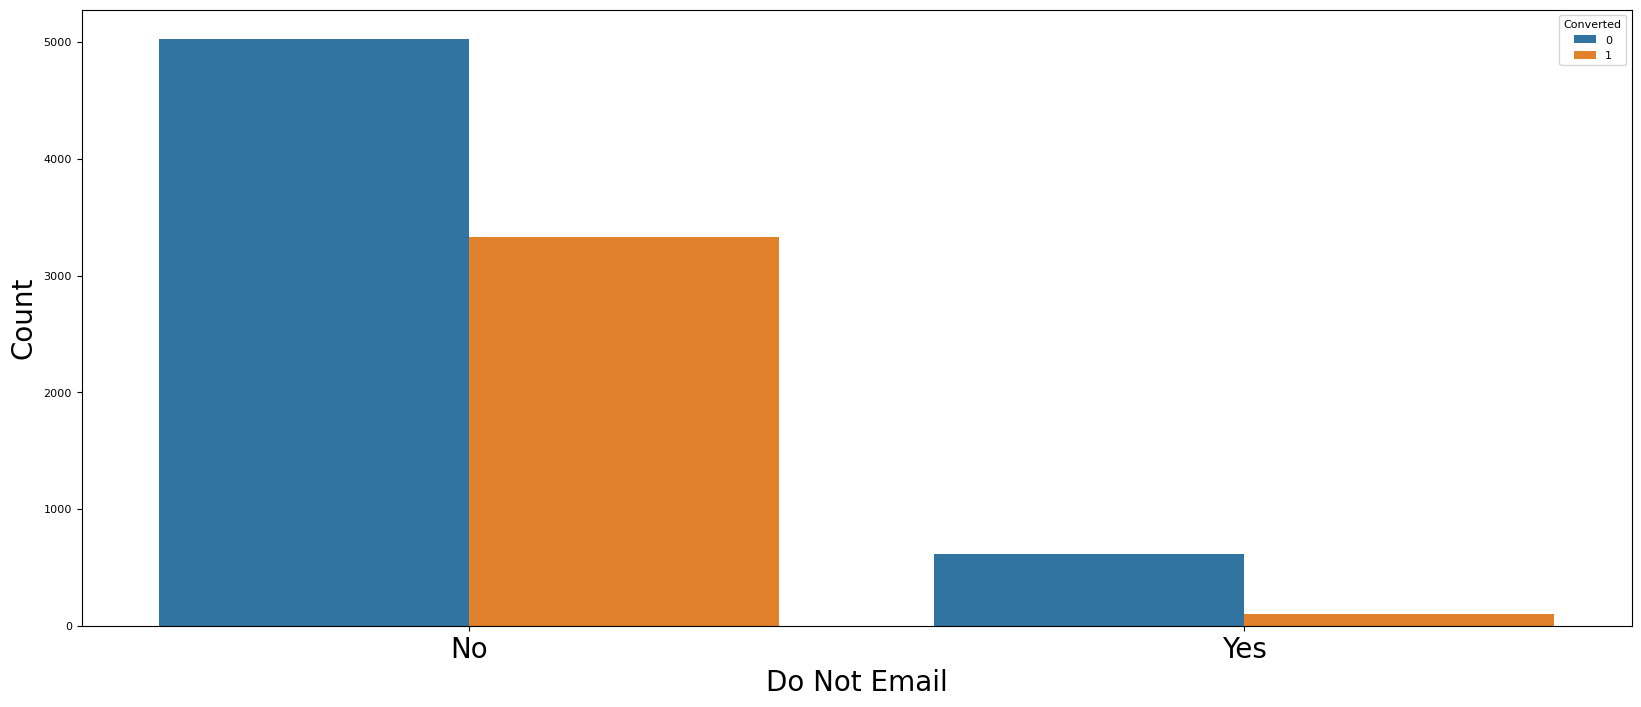

In [59]:
plt.figure(figsize = (20,8))
sns.countplot(x = lead['Do Not Email'],hue = lead.Converted)
plt.xticks(fontsize=20)
plt.xlabel('Do Not Email', size = 20)
plt.ylabel('Count', size = 20)
plt.show()

In [60]:
lead.Converted.value_counts()

Converted
0    5639
1    3435
Name: count, dtype: int64

Variance is fine.

**TotalVisits**

<Axes: xlabel='Converted', ylabel='TotalVisits'>

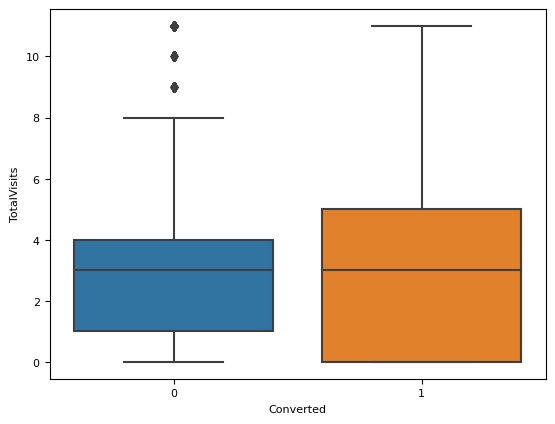

In [61]:
sns.boxplot(x = lead.Converted,y = lead['TotalVisits'])

Both converted and not converted has almost same median from total visits.

**Total Time Spent on Website**

<Axes: ylabel='Total Time Spent on Website'>

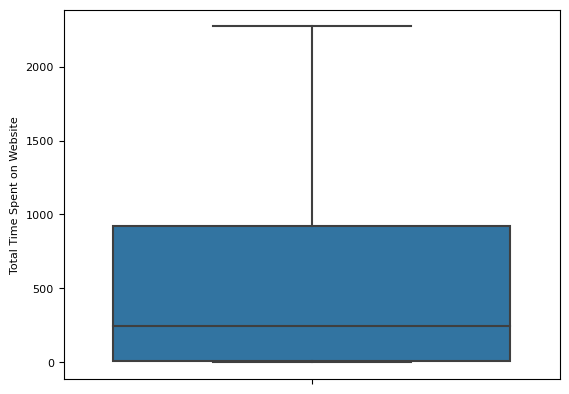

In [62]:
sns.boxplot(y = lead['Total Time Spent on Website'])

<Axes: xlabel='Converted', ylabel='Total Time Spent on Website'>

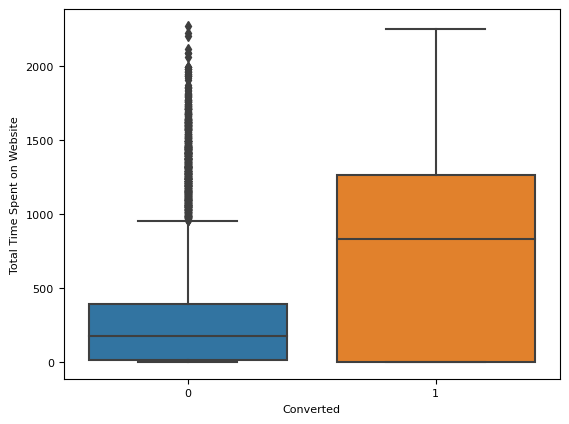

In [63]:
sns.boxplot(x = lead.Converted,y = lead['Total Time Spent on Website'])

Those converted leads have more amount of median time on website than not converted leads interactive and immersive website with good UI UX can be a game changer.

**Pages Views Per Visit**

<Axes: xlabel='Page Views Per Visit'>

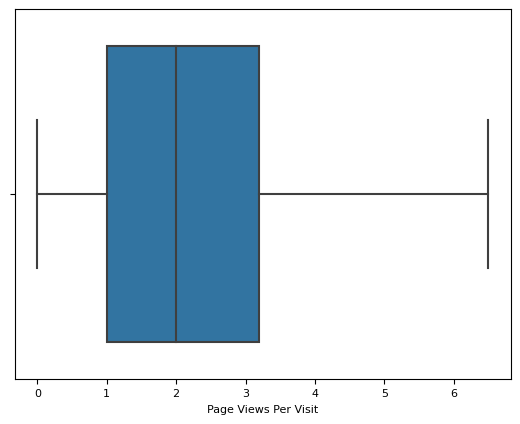

In [64]:
sns.boxplot(x = lead['Page Views Per Visit'])

We can see that outliers are present here.

In [65]:
lead['Page Views Per Visit'].describe(percentiles = [0.25,0.50,0.75,0.90,0.95,0.99])

count    9074.000000
mean        2.285762
std         1.834443
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
90%         5.000000
95%         6.000000
99%         6.500000
max         6.500000
Name: Page Views Per Visit, dtype: float64

<Axes: xlabel='Converted', ylabel='Page Views Per Visit'>

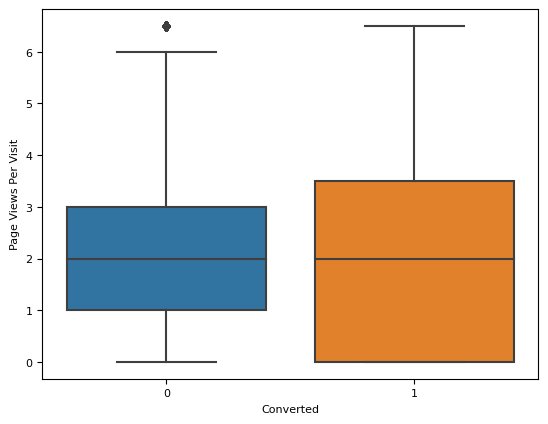

In [66]:
sns.boxplot(x = lead.Converted,y = lead['Page Views Per Visit'])

**Last Activity**

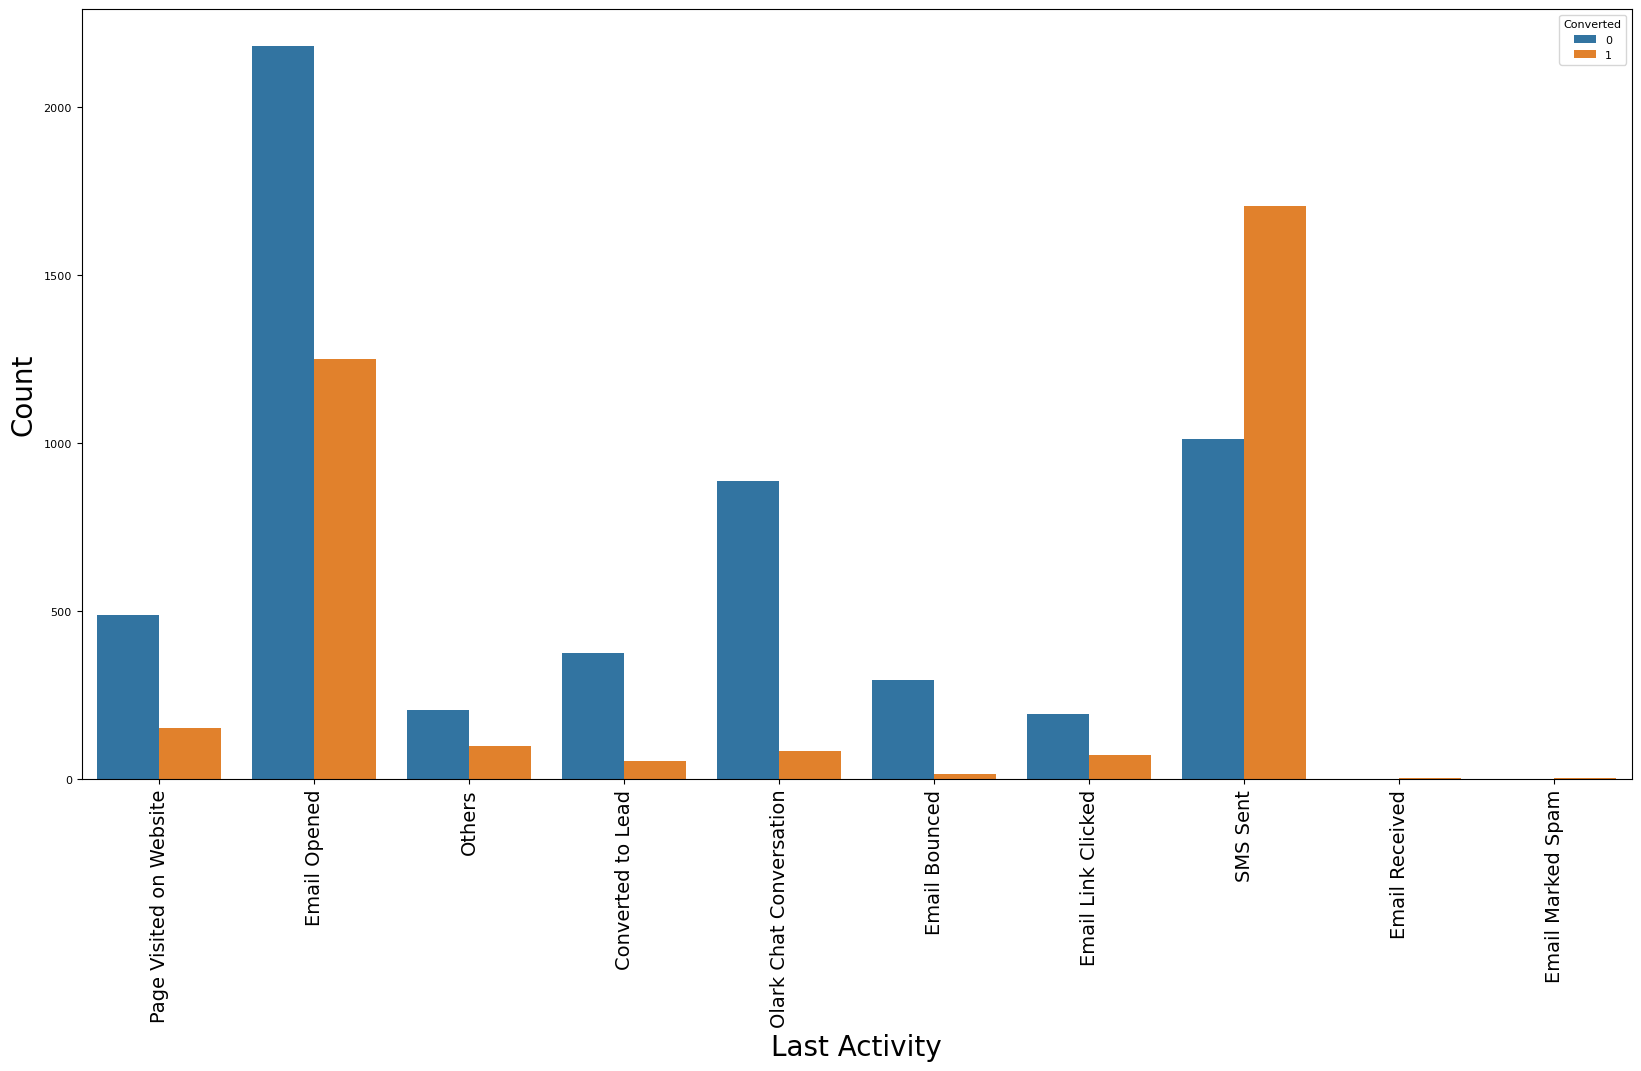

In [67]:
#Last Activity
plt.figure(figsize = (20,10))
sns.countplot(x = lead["Last Activity"], hue = lead.Converted)
plt.xlabel('Last Activity', size = 20)
plt.ylabel('Count', size = 20)
plt.xticks(rotation=90,size=14)
plt.show()

In [68]:
lead['Last Activity'].replace(['Had a Phone Conversation', 
                             'View in browser link Clicked', 
                            'Visited Booth in Tradeshow', 'Approached upfront',
                            'Resubscribed to emails','Email Received', 
                             'Email Marked Spam'], 'Other_Activity',inplace = True)

**Specialization**

In [69]:
lead.Specialization.value_counts()

Specialization
Others                               4106
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Media and Advertising                 202
Travel and Tourism                    202
Name: count, dtype: int64

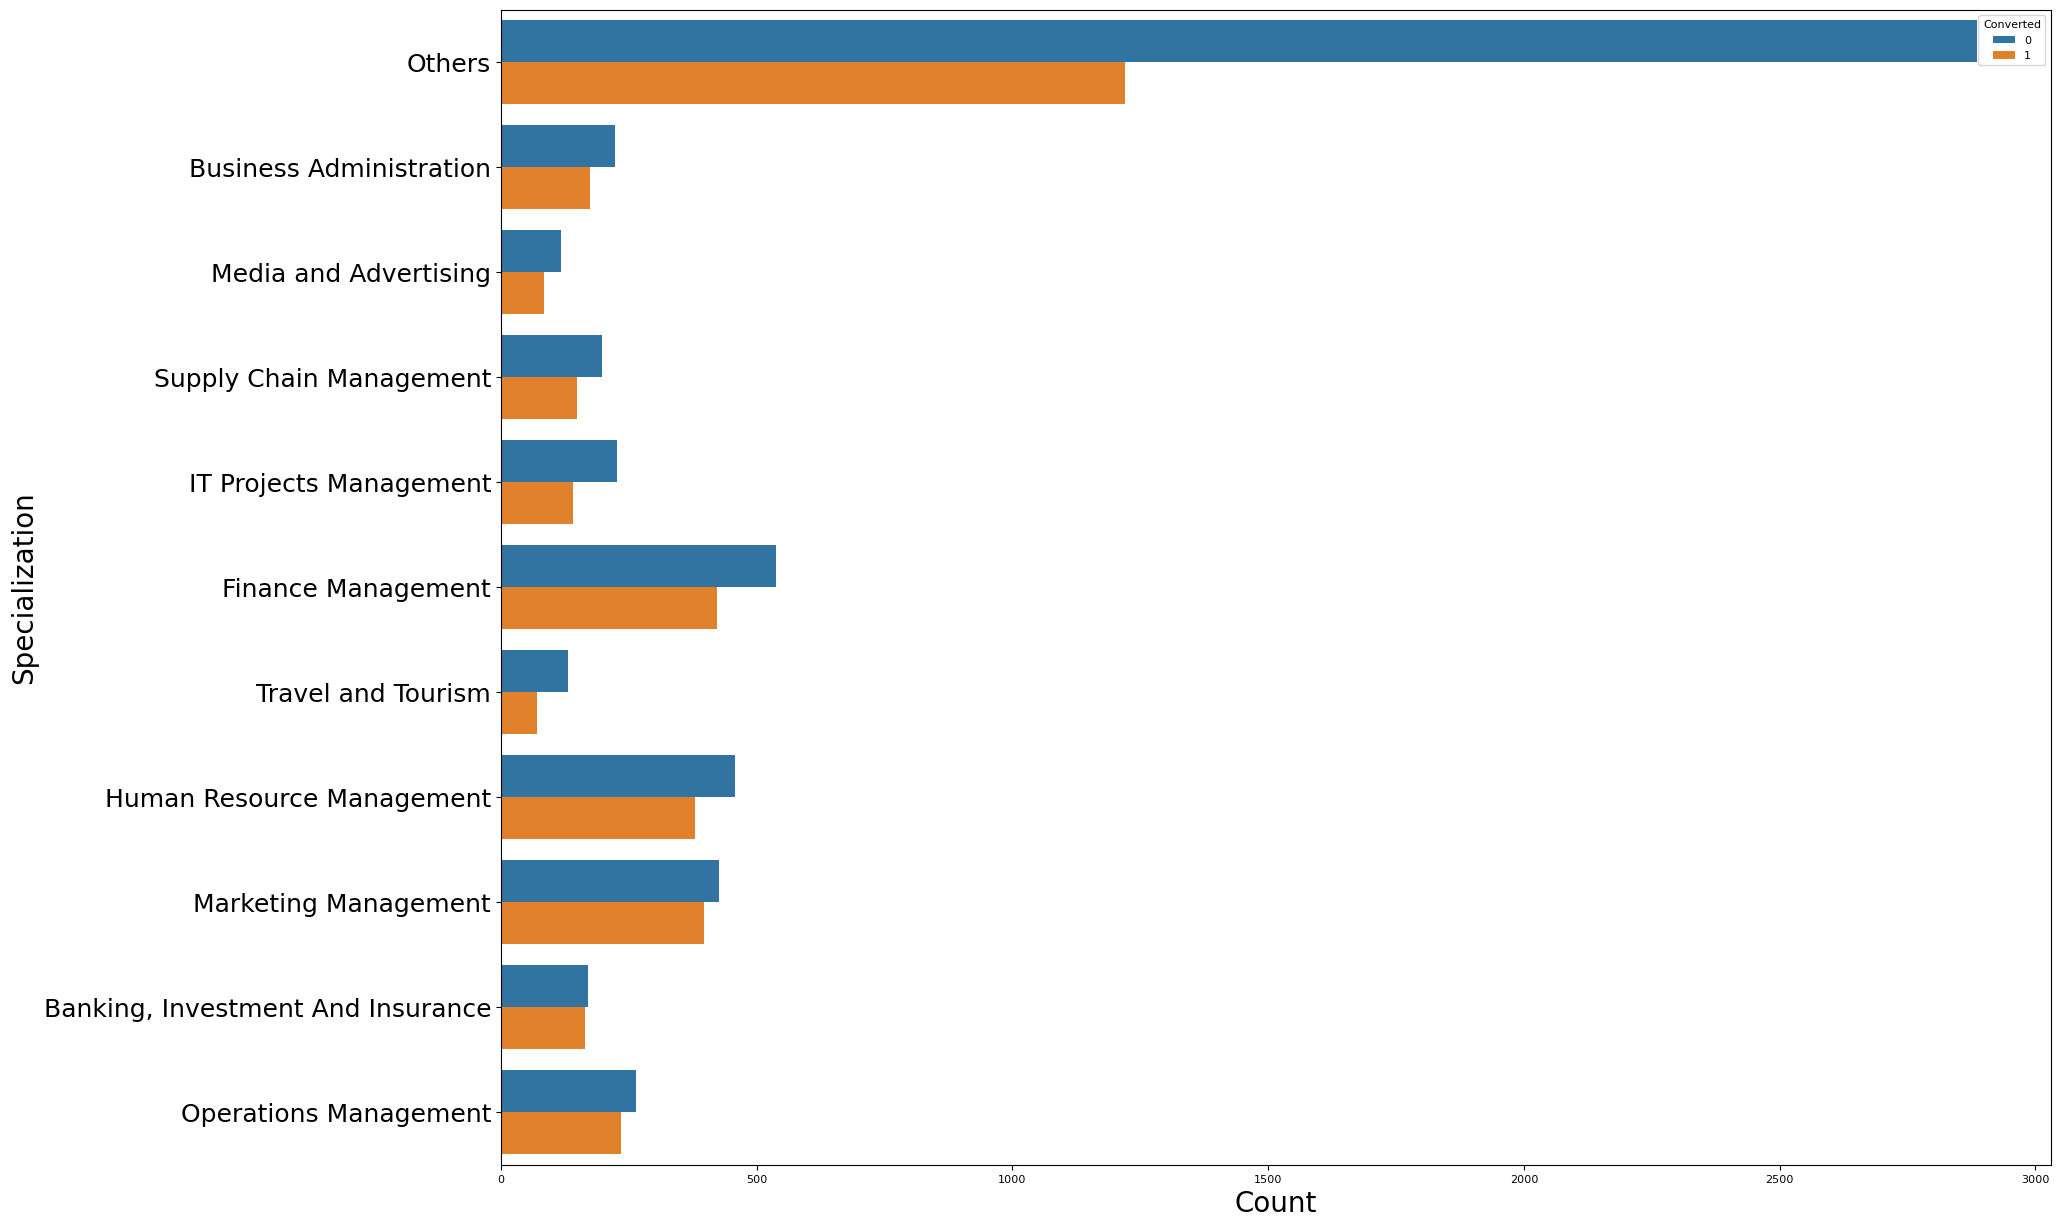

In [70]:
plt.figure(figsize = (20,15))
sns.countplot(y = lead["Specialization"], hue = lead["Converted"])
plt.xlabel('Count', size = 20)
plt.ylabel('Specialization', size = 20)
plt.yticks(fontsize=18)
plt.show()

Working Professionals have high conversion rate as compared to others.<br>
Most of the leads are generated by Unemployeds.

#### Converting Yes and No to 0 and 1

In [71]:
var = ['Do Not Email','A free copy of Mastering The Interview']

lead[var] = lead[var].apply(lambda x:x.map({'Yes':1,'No':0})) 

### Creating Dummy Variables for Objects

In [72]:
lead = pd.get_dummies(lead, drop_first=True).astype(float)

In [73]:
lead.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,...,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,5.0,674.0,2.5,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,2.0,1532.0,2.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,305.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,2.0,1428.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Train Test Split

In [74]:
# Importig Required Libraries

from sklearn.model_selection import train_test_split

In [75]:
X = lead.drop('Converted',axis = 1)
y = lead['Converted']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state=37)

### Feature Scaling using MinMaxScaller()

In [77]:
lead.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,...,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,5.0,674.0,2.5,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,2.0,1532.0,2.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,305.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,2.0,1428.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [78]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

maxvar = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

X_train[maxvar] = scaler.fit_transform(X_train[maxvar])

In [79]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,...,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
7893,0.0,1.000000,0.812060,0.416923,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8076,0.0,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
562,0.0,0.181818,0.099472,0.307692,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7324,0.0,0.272727,0.476673,0.230769,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4533,0.0,0.181818,0.446303,0.307692,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Looking for correlation

In [80]:
lead.corr() >0.8

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,...,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
Do Not Email,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Converted,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
TotalVisits,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Total Time Spent on Website,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Page Views Per Visit,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
A free copy of Mastering The Interview,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Lead Origin_Landing Page Submission,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Lead Origin_Lead Add Form,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
Lead Origin_Lead Import,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Lead Source_Google,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


<Axes: >

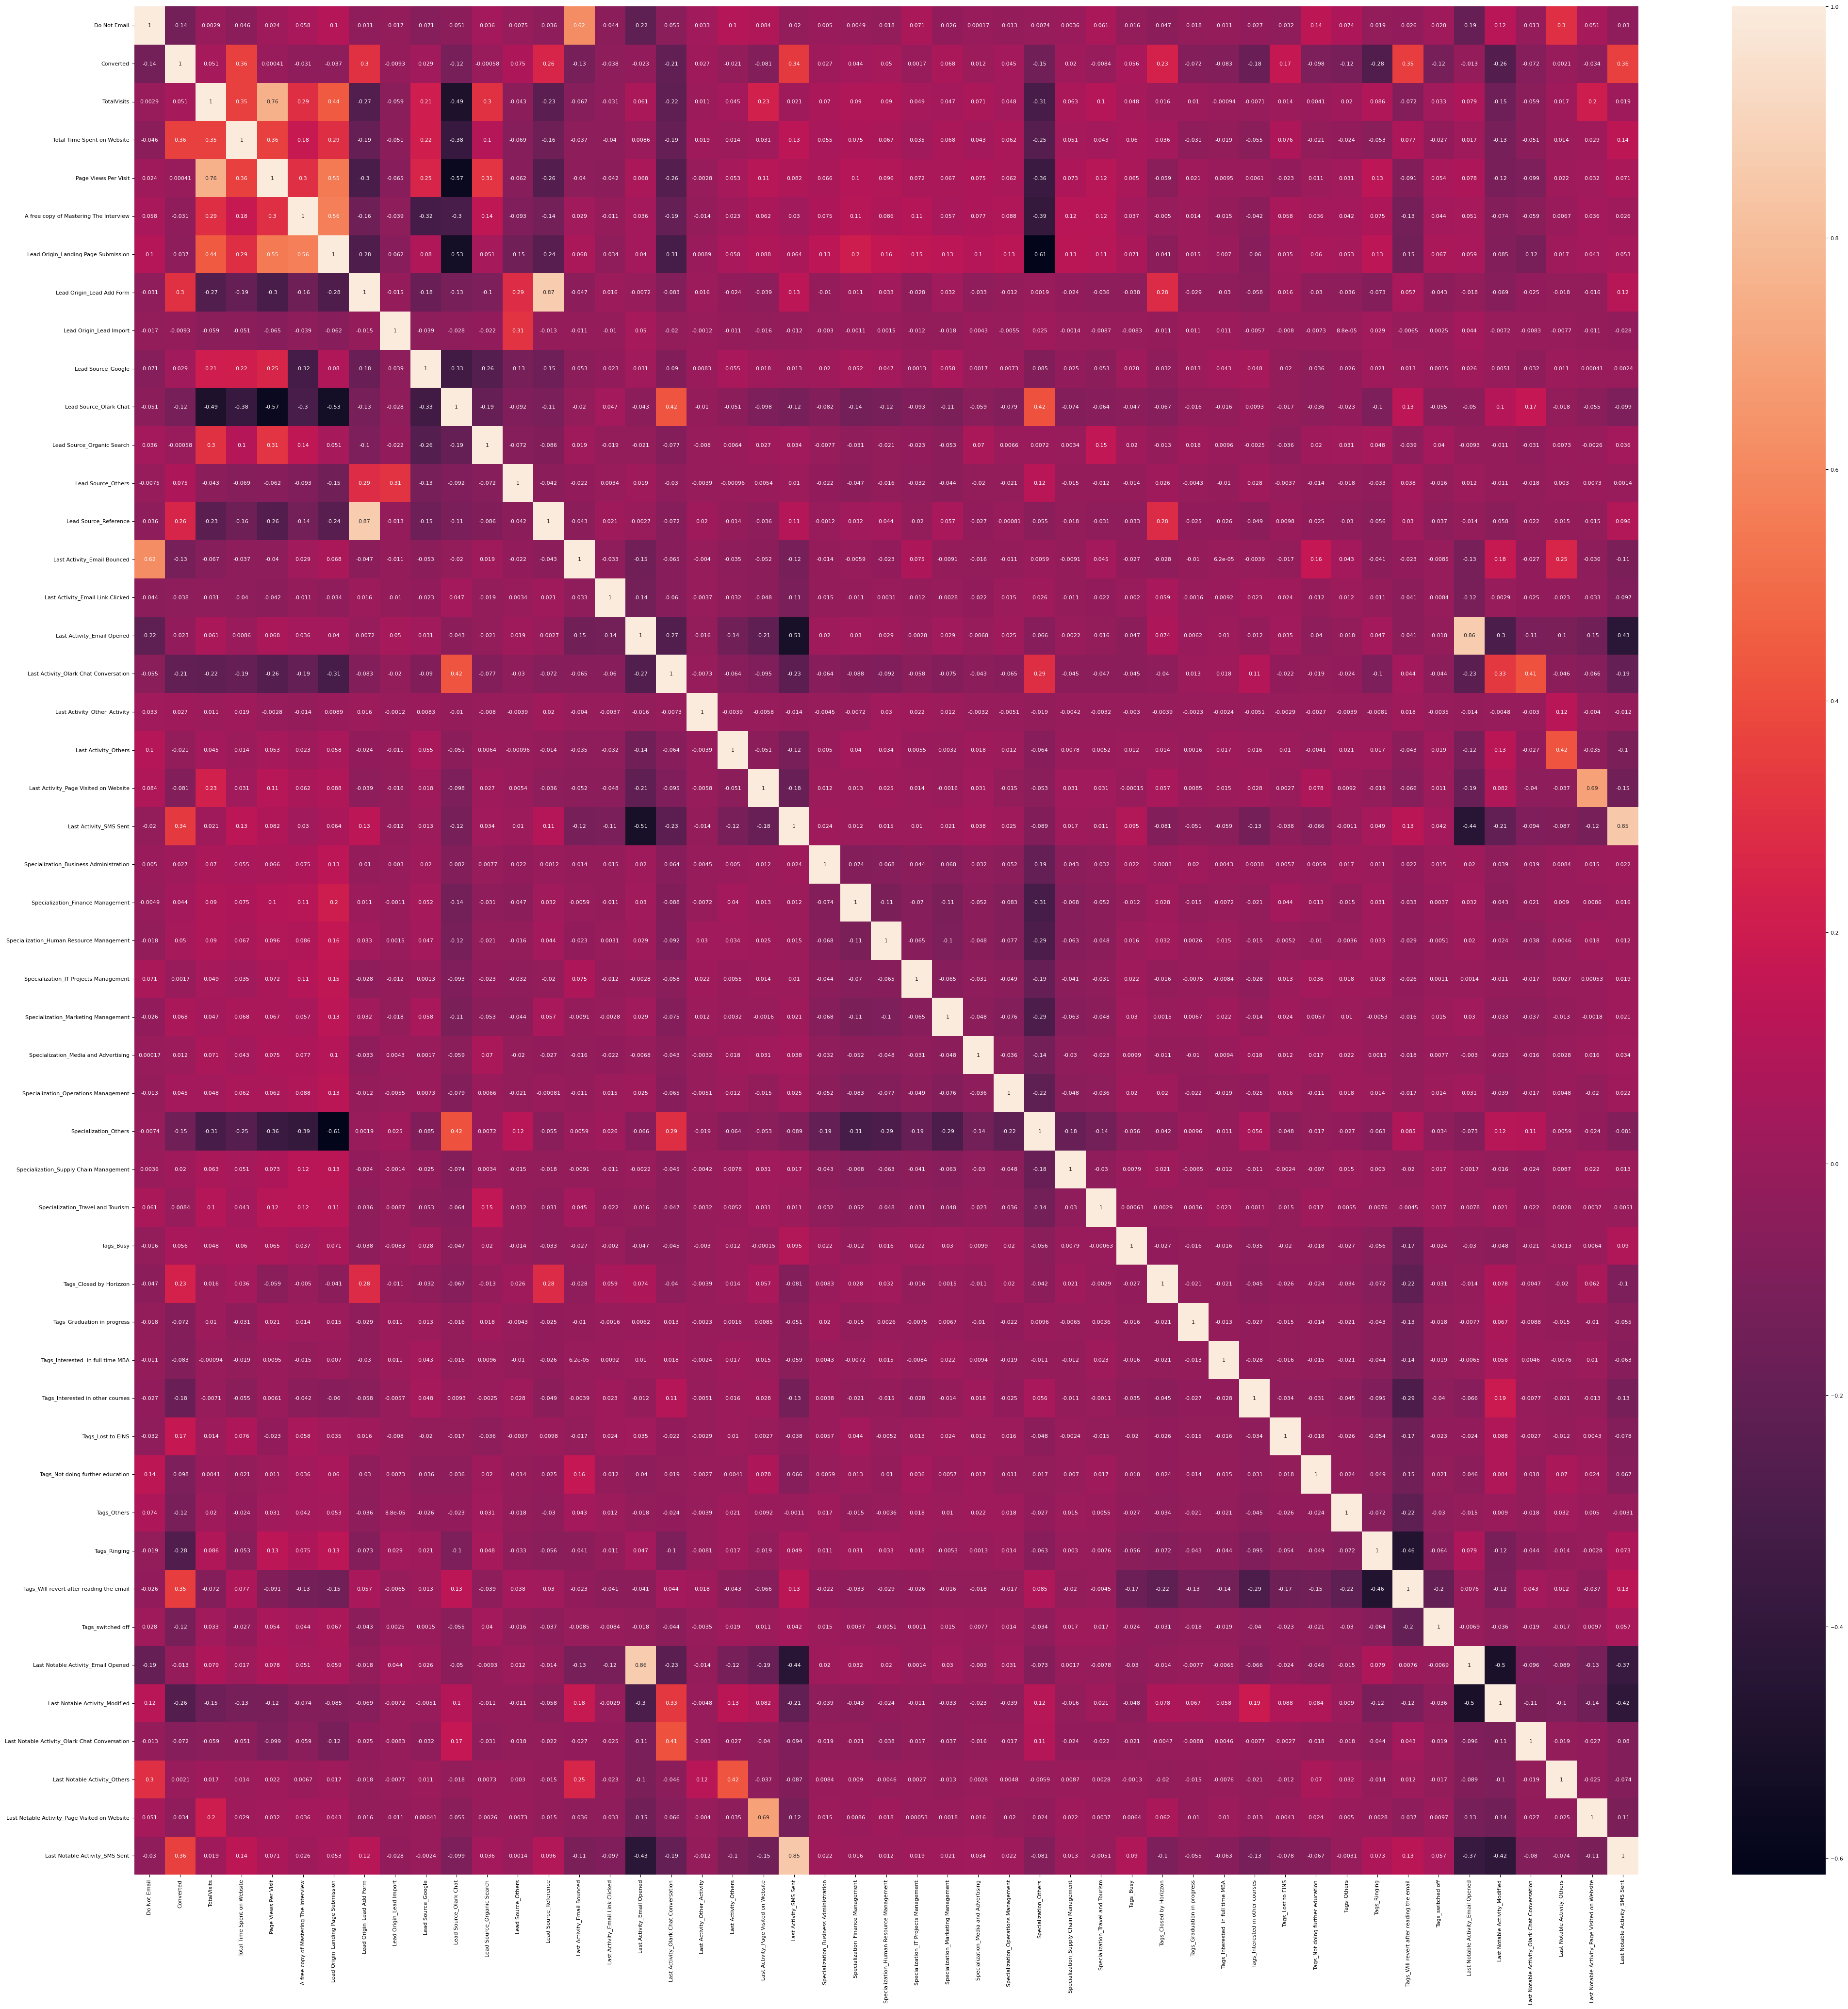

In [81]:
plt.figure(figsize=(50,50))
sns.heatmap(lead.corr(),annot=True)


In [82]:
high_correlation = ['Lead Source_Reference','Lead Origin_Lead Add Form',
                    'Last Notable Activity_Email Opened','Last Activity_Email Opened',
                   'Last Activity_SMS Sent','Last Notable Activity_SMS Sent']

<Axes: >

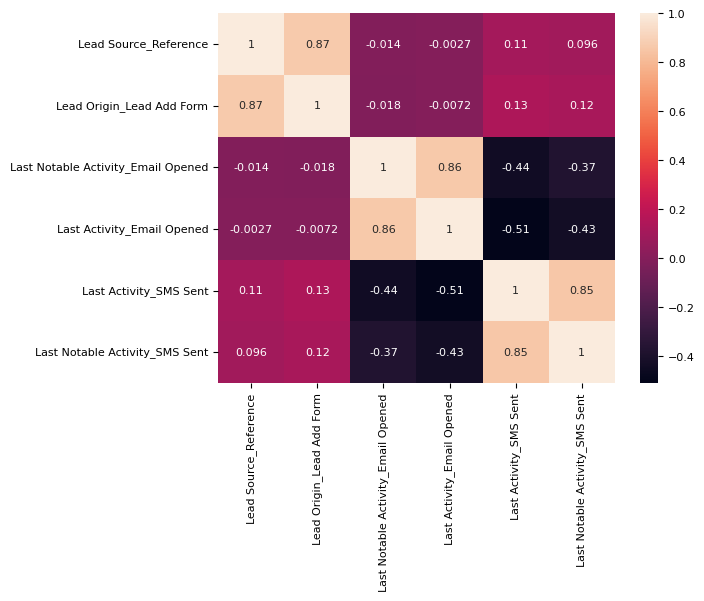

In [83]:
sns.heatmap(lead[high_correlation].corr(),annot = True)

#### This features are highly correlated hence it is good to remove those features

In [84]:
X_train.drop(high_correlation,axis = 1, inplace=True)
X_test.drop(high_correlation,axis = 1, inplace=True)

## Feature Selection Using RFE

In [85]:
# importing necessary libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [86]:
regexp = LogisticRegression()

rfe = RFE(regexp, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [87]:
# Checking the output of RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 6),
 ('TotalVisits', False, 16),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 4),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Import', False, 2),
 ('Lead Source_Google', False, 5),
 ('Lead Source_Olark Chat', False, 3),
 ('Lead Source_Organic Search', False, 20),
 ('Lead Source_Others', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Activity', False, 9),
 ('Last Activity_Others', False, 10),
 ('Last Activity_Page Visited on Website', False, 8),
 ('Specialization_Business Administration', False, 23),
 ('Specialization_Finance Management', False, 12),
 ('Specialization_Human Resource Management', False, 15),
 ('Specialization_IT Projects Management', False, 22),
 ('Specialization_Marketing Management', False, 17),
 ('Speciali

In [88]:
# columns which are selected by RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Source_Others',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Olark Chat Conversation', 'Specialization_Others',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Graduation in progress',
       'Tags_Interested  in full time MBA', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [89]:
# diffining a function for calculating VIFs for variables
def get_vif(model_df):
    X = pd.DataFrame()
    X['Features'] = model_df.columns
    X['VIF'] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    X['VIF'] = round(X['VIF'], 2)
    X = X.sort_values(by='VIF', ascending=False)
    X = X.reset_index(drop=True)
    return X

## Model 1

In [90]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [91]:
# Building model using statsmodels, for the detailed statistics

# Taking the columns that were selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant Cariable
X_train_sm1 = sm.add_constant(X_train_rfe)

logm1 = sm.GLM(y_train, X_train_sm1, family=sm.families.Binomial()).fit()

logm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2094.7
Date:                Sun, 14 Jan 2024   Deviance:                       4189.4
Time:                        08:35:18   Pearson chi2:                 8.55e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.4876
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.5401      0.247    -10.286      0.000      -3.024      -2.056
Total Time Spent on Website                       4.2168      0.194     21.732      0.000       3.836       4.597
Page Views Per Visit                             -1.0250      0.175     -5.868      0.000      -1.367      -0.683
Lead Origin_Landing Page Submission              -1.0380      0.115     -9.003      0.000      -1.264      -0.812
Lead Source_Others                                1.1248      0.203      5.545      0.000       0.727       1.522
Last Activity_Email Bounced                      -2.1888      0.353     -6.192      0.000      -2.882      -1.496
Last Activity_Email Link Clicked                 -1.1757      0.240     -4.894      0.000      -1.646      -0.705
Last Activity_Olark Chat Conversation            -0.9894      0.206     -4.808      0.000      -1.393      -0.586
Specialization_Others                            -1.1836      0.101    -11.758      0.000      -1.381      -0.986
Tags_Busy                                         3.4589      0.315     10.981      0.000       2.841       4.076
Tags_Closed by Horizzon                           9.2021      0.758     12.143      0.000       7.717      10.687
Tags_Graduation in progress                       1.5974      0.588      2.717      0.007       0.445       2.750
Tags_Interested  in full time MBA                -0.9793      1.067     -0.918      0.359      -3.070       1.111
Tags_Lost to EINS                                 7.9644      0.587     13.575      0.000       6.814       9.114
Tags_Not doing further education                -21.2854   1.79e+04     -0.001      0.999   -3.51e+04    3.51e+04
Tags_Ringing                                     -0.3132      0.305     -1.026      0.305      -0.912       0.285
Tags_Will revert after reading the email          3.8914      0.234     16.647      0.000       3.433       4.350
Tags_switched off                                -0.4927      0.574     -0.859      0.390      -1.617       0.631
Last Notable Activity_Modified                   -1.6867      0.098    -17.173      0.000      -1.879      -1.494
Last Notable Activity_Olark Chat Conversation    -1.9005      0.398     -4.771      0.000      -2.681      -1.120
Last Notable Activity_Page Visited on Website    -1.8352      0.223     -8.230      0.000      -2.272      -1.398
=================================================================================================================
"""

In [92]:
get_vif(X_train_sm1)

,Features,VIF
0,const,15.91
1,Tags_Will revert after reading the email,2.30
2,Lead Origin_Landing Page Submission,2.10
3,Tags_Ringing,1.82
4,Last Activity_Olark Chat Conversation,1.68
5,Specialization_Others,1.64
6,Page Views Per Visit,1.58
7,Last Notable Activity_Modified,1.40
8,Last Notable Activity_Olark Chat Conversation,1.33
9,Total Time Spent on Website,1.25


- `Tags_Not doing further education` has very high p-value so that column will be drop

In [93]:
X_train_rfe.drop('Tags_Not doing further education',axis = 1, inplace = True)

C:\Users\SD\AppData\Local\Temp\ipykernel_5912\2458059948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_rfe.drop('Tags_Not doing further education',axis = 1, inplace = True)


## Model 2

In [94]:
X_train_sm2 = sm.add_constant(X_train_rfe)

logm2 = sm.GLM(y_train, X_train_sm2, family=sm.families.Binomial()).fit()

logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2096.5
Date:                Sun, 14 Jan 2024   Deviance:                       4193.1
Time:                        08:35:18   Pearson chi2:                 8.67e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4873
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.6277      0.246    -10.689      0.000      -3.110      -2.146
Total Time Spent on Website                       4.2180      0.194     21.732      0.000       3.838       4.598
Page Views Per Visit                             -1.0264      0.175     -5.878      0.000      -1.369      -0.684
Lead Origin_Landing Page Submission              -1.0393      0.115     -9.012      0.000      -1.265      -0.813
Lead Source_Others                                1.1236      0.203      5.541      0.000       0.726       1.521
Last Activity_Email Bounced                      -2.1920      0.353     -6.207      0.000      -2.884      -1.500
Last Activity_Email Link Clicked                 -1.1747      0.240     -4.888      0.000      -1.646      -0.704
Last Activity_Olark Chat Conversation            -0.9869      0.206     -4.795      0.000      -1.390      -0.584
Specialization_Others                            -1.1834      0.101    -11.752      0.000      -1.381      -0.986
Tags_Busy                                         3.5482      0.314     11.303      0.000       2.933       4.163
Tags_Closed by Horizzon                           9.2922      0.757     12.269      0.000       7.808      10.777
Tags_Graduation in progress                       1.6873      0.587      2.872      0.004       0.536       2.839
Tags_Interested  in full time MBA                -0.8906      1.066     -0.835      0.404      -2.980       1.199
Tags_Lost to EINS                                 8.0546      0.586     13.742      0.000       6.906       9.203
Tags_Ringing                                     -0.2245      0.304     -0.738      0.461      -0.821       0.372
Tags_Will revert after reading the email          3.9804      0.232     17.129      0.000       3.525       4.436
Tags_switched off                                -0.4039      0.573     -0.705      0.481      -1.527       0.719
Last Notable Activity_Modified                   -1.6893      0.098    -17.208      0.000      -1.882      -1.497
Last Notable Activity_Olark Chat Conversation    -1.9032      0.398     -4.777      0.000      -2.684      -1.122
Last Notable Activity_Page Visited on Website    -1.8354      0.223     -8.230      0.000      -2.273      -1.398
=================================================================================================================
"""

In [95]:
get_vif(X_train_sm2)

,Features,VIF
0,const,15.33
1,Tags_Will revert after reading the email,2.13
2,Lead Origin_Landing Page Submission,2.10
3,Tags_Ringing,1.74
4,Last Activity_Olark Chat Conversation,1.68
5,Specialization_Others,1.64
6,Page Views Per Visit,1.58
7,Last Notable Activity_Modified,1.40
8,Last Notable Activity_Olark Chat Conversation,1.33
9,Total Time Spent on Website,1.25


- `Tags_switched off` has very high p-value so that column will be drop

In [96]:
X_train_rfe.drop('Tags_switched off',axis = 1, inplace = True)

C:\Users\SD\AppData\Local\Temp\ipykernel_5912\2349326195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_rfe.drop('Tags_switched off',axis = 1, inplace = True)


## Model 3

In [97]:
X_train_sm3 = sm.add_constant(X_train_rfe)

logm3 = sm.GLM(y_train, X_train_sm3, family=sm.families.Binomial()).fit()

logm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2096.8
Date:                Sun, 14 Jan 2024   Deviance:                       4193.6
Time:                        08:35:19   Pearson chi2:                 8.56e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4872
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.6990      0.229    -11.766      0.000      -3.149      -2.249
Total Time Spent on Website                       4.2196      0.194     21.745      0.000       3.839       4.600
Page Views Per Visit                             -1.0268      0.175     -5.880      0.000      -1.369      -0.685
Lead Origin_Landing Page Submission              -1.0406      0.115     -9.020      0.000      -1.267      -0.814
Lead Source_Others                                1.1252      0.203      5.546      0.000       0.728       1.523
Last Activity_Email Bounced                      -2.1912      0.353     -6.203      0.000      -2.884      -1.499
Last Activity_Email Link Clicked                 -1.1734      0.240     -4.881      0.000      -1.645      -0.702
Last Activity_Olark Chat Conversation            -0.9870      0.206     -4.795      0.000      -1.391      -0.584
Specialization_Others                            -1.1839      0.101    -11.753      0.000      -1.381      -0.986
Tags_Busy                                         3.6201      0.301     12.030      0.000       3.030       4.210
Tags_Closed by Horizzon                           9.3627      0.752     12.444      0.000       7.888      10.837
Tags_Graduation in progress                       1.7588      0.581      3.029      0.002       0.621       2.897
Tags_Interested  in full time MBA                -0.8196      1.063     -0.771      0.441      -2.902       1.263
Tags_Lost to EINS                                 8.1253      0.580     14.019      0.000       6.989       9.261
Tags_Ringing                                     -0.1527      0.291     -0.525      0.599      -0.723       0.417
Tags_Will revert after reading the email          4.0519      0.215     18.866      0.000       3.631       4.473
Last Notable Activity_Modified                   -1.6879      0.098    -17.191      0.000      -1.880      -1.495
Last Notable Activity_Olark Chat Conversation    -1.9022      0.398     -4.774      0.000      -2.683      -1.121
Last Notable Activity_Page Visited on Website    -1.8347      0.223     -8.225      0.000      -2.272      -1.397
=================================================================================================================
"""

In [98]:
get_vif(X_train_sm3)

,Features,VIF
0,const,14.10
1,Lead Origin_Landing Page Submission,2.10
2,Tags_Will revert after reading the email,1.88
3,Last Activity_Olark Chat Conversation,1.68
4,Specialization_Others,1.64
5,Tags_Ringing,1.60
6,Page Views Per Visit,1.58
7,Last Notable Activity_Modified,1.40
8,Last Notable Activity_Olark Chat Conversation,1.33
9,Total Time Spent on Website,1.25


- `Tags_Ringing` has very high p-value so that column will be drop

In [99]:
X_train_rfe.drop('Tags_Ringing',axis = 1, inplace = True)

C:\Users\SD\AppData\Local\Temp\ipykernel_5912\1220705439.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_rfe.drop('Tags_Ringing',axis = 1, inplace = True)


## Model 4

In [100]:
X_train_sm4 = sm.add_constant(X_train_rfe)

logm4 = sm.GLM(y_train, X_train_sm4, family=sm.families.Binomial()).fit()

logm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2096.9
Date:                Sun, 14 Jan 2024   Deviance:                       4193.9
Time:                        08:35:19   Pearson chi2:                 8.62e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4872
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.7777      0.177    -15.656      0.000      -3.125      -2.430
Total Time Spent on Website                       4.2201      0.194     21.750      0.000       3.840       4.600
Page Views Per Visit                             -1.0284      0.175     -5.891      0.000      -1.371      -0.686
Lead Origin_Landing Page Submission              -1.0413      0.115     -9.024      0.000      -1.267      -0.815
Lead Source_Others                                1.1264      0.203      5.549      0.000       0.729       1.524
Last Activity_Email Bounced                      -2.1907      0.353     -6.201      0.000      -2.883      -1.498
Last Activity_Email Link Clicked                 -1.1722      0.240     -4.874      0.000      -1.644      -0.701
Last Activity_Olark Chat Conversation            -0.9872      0.206     -4.795      0.000      -1.391      -0.584
Specialization_Others                            -1.1844      0.101    -11.755      0.000      -1.382      -0.987
Tags_Busy                                         3.6998      0.262     14.098      0.000       3.185       4.214
Tags_Closed by Horizzon                           9.4408      0.738     12.784      0.000       7.993      10.888
Tags_Graduation in progress                       1.8381      0.562      3.271      0.001       0.737       2.939
Tags_Interested  in full time MBA                -0.7404      1.052     -0.704      0.482      -2.803       1.322
Tags_Lost to EINS                                 8.2036      0.561     14.615      0.000       7.103       9.304
Tags_Will revert after reading the email          4.1311      0.157     26.276      0.000       3.823       4.439
Last Notable Activity_Modified                   -1.6865      0.098    -17.177      0.000      -1.879      -1.494
Last Notable Activity_Olark Chat Conversation    -1.9009      0.399     -4.770      0.000      -2.682      -1.120
Last Notable Activity_Page Visited on Website    -1.8337      0.223     -8.219      0.000      -2.271      -1.396
=================================================================================================================
"""

In [101]:
get_vif(X_train_sm4)

,Features,VIF
0,const,11.33
1,Lead Origin_Landing Page Submission,2.10
2,Last Activity_Olark Chat Conversation,1.68
3,Specialization_Others,1.64
4,Page Views Per Visit,1.58
5,Last Notable Activity_Modified,1.37
6,Last Notable Activity_Olark Chat Conversation,1.33
7,Tags_Will revert after reading the email,1.26
8,Total Time Spent on Website,1.25
9,Tags_Closed by Horizzon,1.13


- `Tags_Interested  in full time MBA` has very high p-value so that column will be drop

In [102]:
X_train_rfe.drop('Tags_Interested  in full time MBA',axis = 1, inplace = True)

C:\Users\SD\AppData\Local\Temp\ipykernel_5912\2495244273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_rfe.drop('Tags_Interested  in full time MBA',axis = 1, inplace = True)


## Model 5

In [103]:
X_train_sm5 = sm.add_constant(X_train_rfe)

logm5 = sm.GLM(y_train, X_train_sm5, family=sm.families.Binomial()).fit()

logm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2097.3
Date:                Sun, 14 Jan 2024   Deviance:                       4194.5
Time:                        08:35:19   Pearson chi2:                 8.66e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4872
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.7983      0.176    -15.899      0.000      -3.143      -2.453
Total Time Spent on Website                       4.2189      0.194     21.745      0.000       3.839       4.599
Page Views Per Visit                             -1.0298      0.175     -5.898      0.000      -1.372      -0.688
Lead Origin_Landing Page Submission              -1.0383      0.115     -9.010      0.000      -1.264      -0.812
Lead Source_Others                                1.1278      0.203      5.554      0.000       0.730       1.526
Last Activity_Email Bounced                      -2.1902      0.353     -6.199      0.000      -2.883      -1.498
Last Activity_Email Link Clicked                 -1.1726      0.240     -4.877      0.000      -1.644      -0.701
Last Activity_Olark Chat Conversation            -0.9867      0.206     -4.793      0.000      -1.390      -0.583
Specialization_Others                            -1.1829      0.101    -11.750      0.000      -1.380      -0.986
Tags_Busy                                         3.7187      0.262     14.211      0.000       3.206       4.232
Tags_Closed by Horizzon                           9.4606      0.738     12.816      0.000       8.014      10.907
Tags_Graduation in progress                       1.8573      0.562      3.308      0.001       0.757       2.958
Tags_Lost to EINS                                 8.2231      0.561     14.659      0.000       7.124       9.323
Tags_Will revert after reading the email          4.1503      0.156     26.616      0.000       3.845       4.456
Last Notable Activity_Modified                   -1.6875      0.098    -17.193      0.000      -1.880      -1.495
Last Notable Activity_Olark Chat Conversation    -1.9011      0.398     -4.771      0.000      -2.682      -1.120
Last Notable Activity_Page Visited on Website    -1.8338      0.223     -8.219      0.000      -2.271      -1.396
=================================================================================================================
"""

In [104]:
get_vif(X_train_sm5)

,Features,VIF
0,const,11.20
1,Lead Origin_Landing Page Submission,2.10
2,Last Activity_Olark Chat Conversation,1.68
3,Specialization_Others,1.64
4,Page Views Per Visit,1.58
5,Last Notable Activity_Modified,1.36
6,Last Notable Activity_Olark Chat Conversation,1.33
7,Total Time Spent on Website,1.25
8,Tags_Will revert after reading the email,1.23
9,Tags_Closed by Horizzon,1.12


## Residual Analysis of a training data

In [105]:
y_train_pred = logm5.predict(X_train_sm5)


In [106]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.99981969, 0.41691072, 0.19536402, ..., 0.06228081, 0.52998975,
       0.78532748])

In [107]:
# Creating a dataframe 
y_train_pred_final = pd.DataFrame({'ProspectID':y_train.index,'Converted':y_train.values,'Converted_Prob':y_train_pred}) 

y_train_pred_final.head()

,ProspectID,Converted,Converted_Prob
0,7893,1.0,0.999820
1,8076,0.0,0.416911
2,562,0.0,0.195364
3,7324,1.0,0.957929
4,4533,0.0,0.093594


#### We have to find the optimal cutoff Threshold value of probability.
- Lets start with the default value of 0.5

In [108]:
y_train_final = y_train_pred_final.copy()

In [109]:
y_train_final['Predicted'] = y_train_final['Converted_Prob'].apply(lambda X:1 if X >= 0.5 else 0 )

y_train_final.head(20)

,ProspectID,Converted,Converted_Prob,Predicted
0,7893,1.0,0.999820,1
1,8076,0.0,0.416911,0
2,562,0.0,0.195364,0
3,7324,1.0,0.957929,1
4,4533,0.0,0.093594,0
5,3760,0.0,0.075508,0
6,4889,0.0,0.175351,0
7,3454,0.0,0.390122,0
8,1211,0.0,0.161060,0
9,2146,0.0,0.588650,1


## Confusion Matrix

In [110]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

In [111]:
# Confusio Matrix (actual/predicted)
confusion = metrics.confusion_matrix(y_train_final['Converted'],y_train_final['Predicted'])

print(confusion)

[[3351  586]
 [ 370 2044]]


In [112]:
# Predicted        not_converted  |  converted
# Actual                          |
# -----------------------------------------------------
# not_converted       3588       |   414
# converted           846        |   1620  


# Above is the confusion matrix when we use threshold of probability as 0.5

## Accuracy

In [113]:
# Checking the overall Accuracy.
print(metrics.accuracy_score(y_train_final['Converted'],y_train_final['Predicted']))

0.8494725240119666


## Metrics Beyond Simple Accuracy 

In [114]:
TP = confusion[1,1]     # True Possitive
TN = confusion[0,0]     # True Negative
FP = confusion[0,1]     # False Possitive
FN = confusion[1,0]     # False Negative

## Sensitivity

In [115]:
print('Sensitivity : ',round(TP/float(TP+FN),2))

Sensitivity :  0.85


## Specificity

In [116]:
print('Specificity : ',round(TN/float(TN+FP),2))

Specificity :  0.85


## False Positive Rate

In [117]:
# Calculating the False Positive Rate. Predicting Converted even if lead has Not-Converted
print('False Positive Rate : ',round(FP/float(FP+TN),2))

False Positive Rate :  0.15


In [118]:
# positive predictive value 
print (TP / float(TP+FP))

0.7771863117870722


In [119]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9005643644181671


### 9.4 Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [120]:
# UDF to draw ROC curve 
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [121]:
fpr,tpr,threshold = metrics.roc_curve(y_train_final['Converted'],y_train_final['Converted_Prob'])

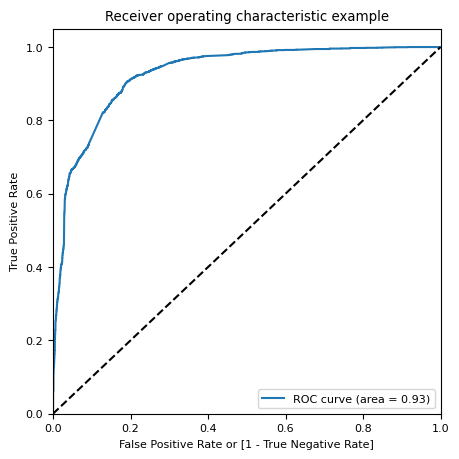

In [122]:
draw_roc(y_train_final['Converted'],y_train_final['Converted_Prob'])

### The ROC Curve is 0.93 out of 1 which indicates a good predictive model 

###  Finding Optimal Cutoff Point/ Probability
- It is that probability where we get `balanced sensitivity and specificity`

In [123]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_final[i]= y_train_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
y_train_final.head()

,ProspectID,Converted,Converted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,7893,1.0,0.999820,1,1,1,1,1,1,1,1,1,1,1
1,8076,0.0,0.416911,0,1,1,1,1,1,0,0,0,0,0
2,562,0.0,0.195364,0,1,1,0,0,0,0,0,0,0,0
3,7324,1.0,0.957929,1,1,1,1,1,1,1,1,1,1,1
4,4533,0.0,0.093594,0,1,0,0,0,0,0,0,0,0,0


In [124]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_final["Converted"], y_train_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380098  1.000000  0.000000
0.1   0.1  0.762557  0.971417  0.634493
0.2   0.2  0.810738  0.942833  0.729743
0.3   0.3  0.838293  0.917150  0.789942
0.4   0.4  0.846166  0.897680  0.814580
0.5   0.5  0.849473  0.846727  0.851156
0.6   0.6  0.842072  0.699669  0.929388
0.7   0.7  0.838923  0.643745  0.958598
0.8   0.8  0.777043  0.458575  0.972314
0.9   0.9  0.728862  0.304060  0.989332


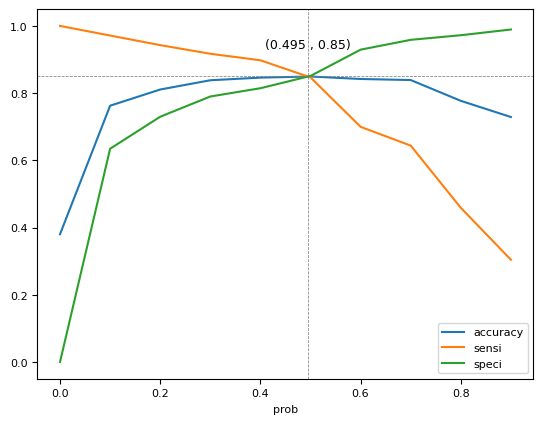

In [125]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Finding the intersection points of the sensitivity and accuracy curves
sensi_interp = interp1d(cutoff_df['prob'], cutoff_df['sensi'], kind='linear')
acc_interp = interp1d(cutoff_df['prob'], cutoff_df['accuracy'], kind='linear')
intersection_1 = np.round(float(fsolve(lambda x : sensi_interp(x) - acc_interp(x), 0.5)), 3)

# Find the intersection points of the specificity and accuracy curves
speci_interp = interp1d(cutoff_df['prob'], cutoff_df['speci'], kind='linear')
intersection_2 = np.round(float(fsolve(lambda x : speci_interp(x) - acc_interp(x), 0.5)), 3)

# Calculate the average of the two intersection points
intersection_x = (intersection_1 + intersection_2) / 2

# Interpolate the accuracy, sensitivity, and specificity at the intersection point
accuracy_at_intersection = np.round(float(acc_interp(intersection_x)), 2)
sensitivity_at_intersection = np.round(float(sensi_interp(intersection_x)), 2)
specificity_at_intersection = np.round(float(speci_interp(intersection_x)), 2)

# Plot the three curves and add vertical and horizontal lines at intersection point
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.axvline(x=intersection_x, color='grey',linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey',linewidth=0.55, linestyle='--')

# Adding annotation to display the (x,y) intersection point coordinates 
plt.annotate(f'({intersection_x} , {accuracy_at_intersection})',
             xy=(intersection_x, accuracy_at_intersection),
             xytext=(0,20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

# Displaying the plot
plt.show()


- The point 0.495 is approx point where all the 3 curve meet.
- So the 0.495 seems to be `Optimal cutoff point` for probability threshold. 

In [126]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final['Converted_Prob'].map(lambda X:1 if X > 0.49 else 0)

y_train_pred_final.head()

,ProspectID,Converted,Converted_Prob,Final_Predicted
0,7893,1.0,0.999820,1
1,8076,0.0,0.416911,0
2,562,0.0,0.195364,0
3,7324,1.0,0.957929,1
4,4533,0.0,0.093594,0


### 9.5 Calculating all metrics using confusion matrix for Train

In [127]:
# UDF for all Logistic Regression Metrics
def logreg_all_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    
    accuracy = (TN+TP)/(TN+TP+FN+FP)
    sensi = TP/(TP+FN)
    speci = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    
    #Calculate false postive rate - predicting conversion when customer does not have converted
    FPR = FP/(FP + TN)     
    FNR = FN/(FN +TP)
    
    print ("True Negative                    : ", TN)
    print ("True Positive                    : ", TP)
    print ("False Negative                   : ", FN)
    print ("False Positve                    : ", FP) 
    
    print ("Model Accuracy                   : ", round(accuracy,4))
    print ("Model Sensitivity                : ", round(sensi,4))
    print ("Model Specificity                : ", round(speci,4))
    print ("Model Precision                  : ", round(precision,4))
    print ("Model Recall                     : ", round(recall,4))
    print ("Model True Positive Rate (TPR)   : ", round(TPR,4))
    print ("Model False Positive Rate (FPR)  : ", round(FPR,4))
    
    

In [128]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Final_Predicted'])
print("-^-"*20,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("-^-"*20,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("-^-"*20,"\n")

-^--^--^--^--^--^--^--^--^--^--^--^--^--^--^--^--^--^--^--^- 

Confusion Matrix
[[3336  601]
 [ 351 2063]] 

-^--^--^--^--^--^--^--^--^--^--^--^--^--^--^--^--^--^--^--^- 

True Negative                    :  3336
True Positive                    :  2063
False Negative                   :  351
False Positve                    :  601
Model Accuracy                   :  0.8501
Model Sensitivity                :  0.8546
Model Specificity                :  0.8473
Model Precision                  :  0.7744
Model Recall                     :  0.8546
Model True Positive Rate (TPR)   :  0.8546
Model False Positive Rate (FPR)  :  0.1527


-^--^--^--^--^--^--^--^--^--^--^--^--^--^--^--^--^--^--^--^- 



### 9.6 Precision and recall tradeoff
- Let's compare all metrics of Precision-Recall view with Specificity-Sensivity view and get better probability threshold for boosting conversion rate to 80% as asked by CEO.

In [129]:
# Creating precision-recall tradeoff curve
y_train_pred_final['Converted'], y_train_pred_final['Final_Predicted']
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

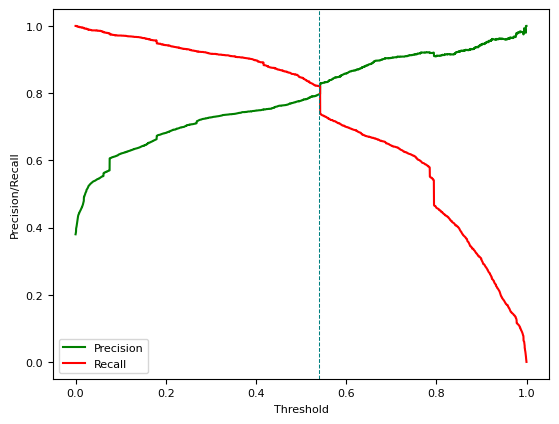

In [130]:
# plot precision-recall tradeoff curve
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")

# add legend and axis labels

plt.axvline(x=0.54, color='teal',linewidth = 0.75, linestyle='--')
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

plt.show()

#### The above graph shows the trade-off between Precision and Recall.


## Making Predictions on Test Set

In [131]:
X_test[maxvar] = scaler.transform(X_test[maxvar])

In [132]:
col = X_train_rfe.columns

In [133]:
# Add Constant
X_test_sm = sm.add_constant(X_test[col])

In [134]:
# Making predictions on the test set and storing in the variable 'y_test_pred'
y_test_pred = logm5.predict(X_test_sm)

In [135]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
6951,0.003045
1184,0.591813
1416,0.542194
1825,0.003148
4122,0.005500


In [136]:
# renaming the column
y_pred_1.rename(columns={0:'Converted_Prob'}, inplace=True)

In [137]:
# Creating a dataframe and adding y_test in that
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
6951,0.0
1184,1.0
1416,1.0
1825,0.0
4122,0.0


In [138]:
# Adding Prospect id to index
y_test_df['ProspectID'] = y_test_df.index

In [139]:
# removing index from both dataframe to place them side by side
y_test_df.reset_index(drop = True, inplace = True)
y_pred_1.reset_index(drop = True, inplace = True)

In [140]:
# Merging the two dataframe in a single dataFrame
y_test_pred_final = pd.concat([y_test_df,y_pred_1], axis = 1)
y_test_pred_final.head()

,Converted,ProspectID,Converted_Prob
0,0.0,6951,0.003045
1,1.0,1184,0.591813
2,1.0,1416,0.542194
3,0.0,1825,0.003148
4,0.0,4122,0.005500


In [141]:
# rearranging the columns
y_test_pred_final = y_test_pred_final.reindex(columns=['ProspectID','Converted','Converted_Prob'])

In [142]:
y_test_pred_final['Converted'] = y_test_pred_final['Converted'].astype(int)

In [143]:
y_test_pred_final['Final_Predicted'] = y_test_pred_final['Converted_Prob'].map(lambda X:1 if X > 0.49 else 0)
y_test_pred_final.head()

,ProspectID,Converted,Converted_Prob,Final_Predicted
0,6951,0,0.003045,0
1,1184,1,0.591813,1
2,1416,1,0.542194,1
3,1825,0,0.003148,0
4,4122,0,0.005500,0


In [144]:
# Check the overall metrix accuracy score
print('Accuracy : ',metrics.accuracy_score(y_test_pred_final['Converted'],y_test_pred_final['Final_Predicted']))

Accuracy :  0.8409842085934631


In [145]:
# Finding Confusion metrics for 'y_test_pred_final'
confusion_test = metrics.confusion_matrix(y_test_pred_final['Converted'],y_test_pred_final['Final_Predicted'])
print("-^-"*20,"\n")

print("Confusion Matrix")
print(confusion_matrix,"\n")

print("-^-"*20,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("-^-"*20,"\n")

-^--^--^--^--^--^--^--^--^--^--^--^--^--^--^--^--^--^--^--^- 

Confusion Matrix
[[3336  601]
 [ 351 2063]] 

-^--^--^--^--^--^--^--^--^--^--^--^--^--^--^--^--^--^--^--^- 

True Negative                    :  3336
True Positive                    :  2063
False Negative                   :  351
False Positve                    :  601
Model Accuracy                   :  0.8501
Model Sensitivity                :  0.8546
Model Specificity                :  0.8473
Model Precision                  :  0.7744
Model Recall                     :  0.8546
Model True Positive Rate (TPR)   :  0.8546
Model False Positive Rate (FPR)  :  0.1527


-^--^--^--^--^--^--^--^--^--^--^--^--^--^--^--^--^--^--^--^- 



In [ ]:
# 🎯<strong><span style="color:brown">Conclusion </span></strong> 

## 📌 Train - Test
### <strong><span style="color:purple">Train Data Set:</span></strong>            

- <strong><span style="color:Green">Accuracy:</span></strong> 85.01 %

- <strong><span style="color:Green">Sensitivity:</span></strong> 85.46 %

- <strong><span style="color:Green">Specificity:</span></strong> 84.73 %

### <strong><span style="color:purple">Test Data Set:</span></strong> 

- <strong><span style="color:Green">Accuracy:</span></strong> 85.01 %

- <strong><span style="color:Green">Sensitivity:</span></strong> 85.46 %

- <strong><span style="color:Green">Specificity:</span></strong> 84.73 %
 

<strong><span style="color:Blue">NOTE:</span></strong> The evaluation matrics are pretty close to each other so it indicates that the model is performing consistently across different evaluation metrics in both test and train dataset.

- The model achieved a sensitivity of 85.46 in both training and  testing set, using a cut-off value of 0.49.
- Sensitivity in this case indicates how many leads the model identify correctly out of all potential leads which are converting
- `The CEO of X Education had set a target sensitivity of around 80%.`
- The model achieved an accuracy of 85.01%, which is in line with the study's objectives.
<hr/>

